In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='viridis')
import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_excel(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\Airlines-Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<Axes: xlabel='Passengers', ylabel='Density'>

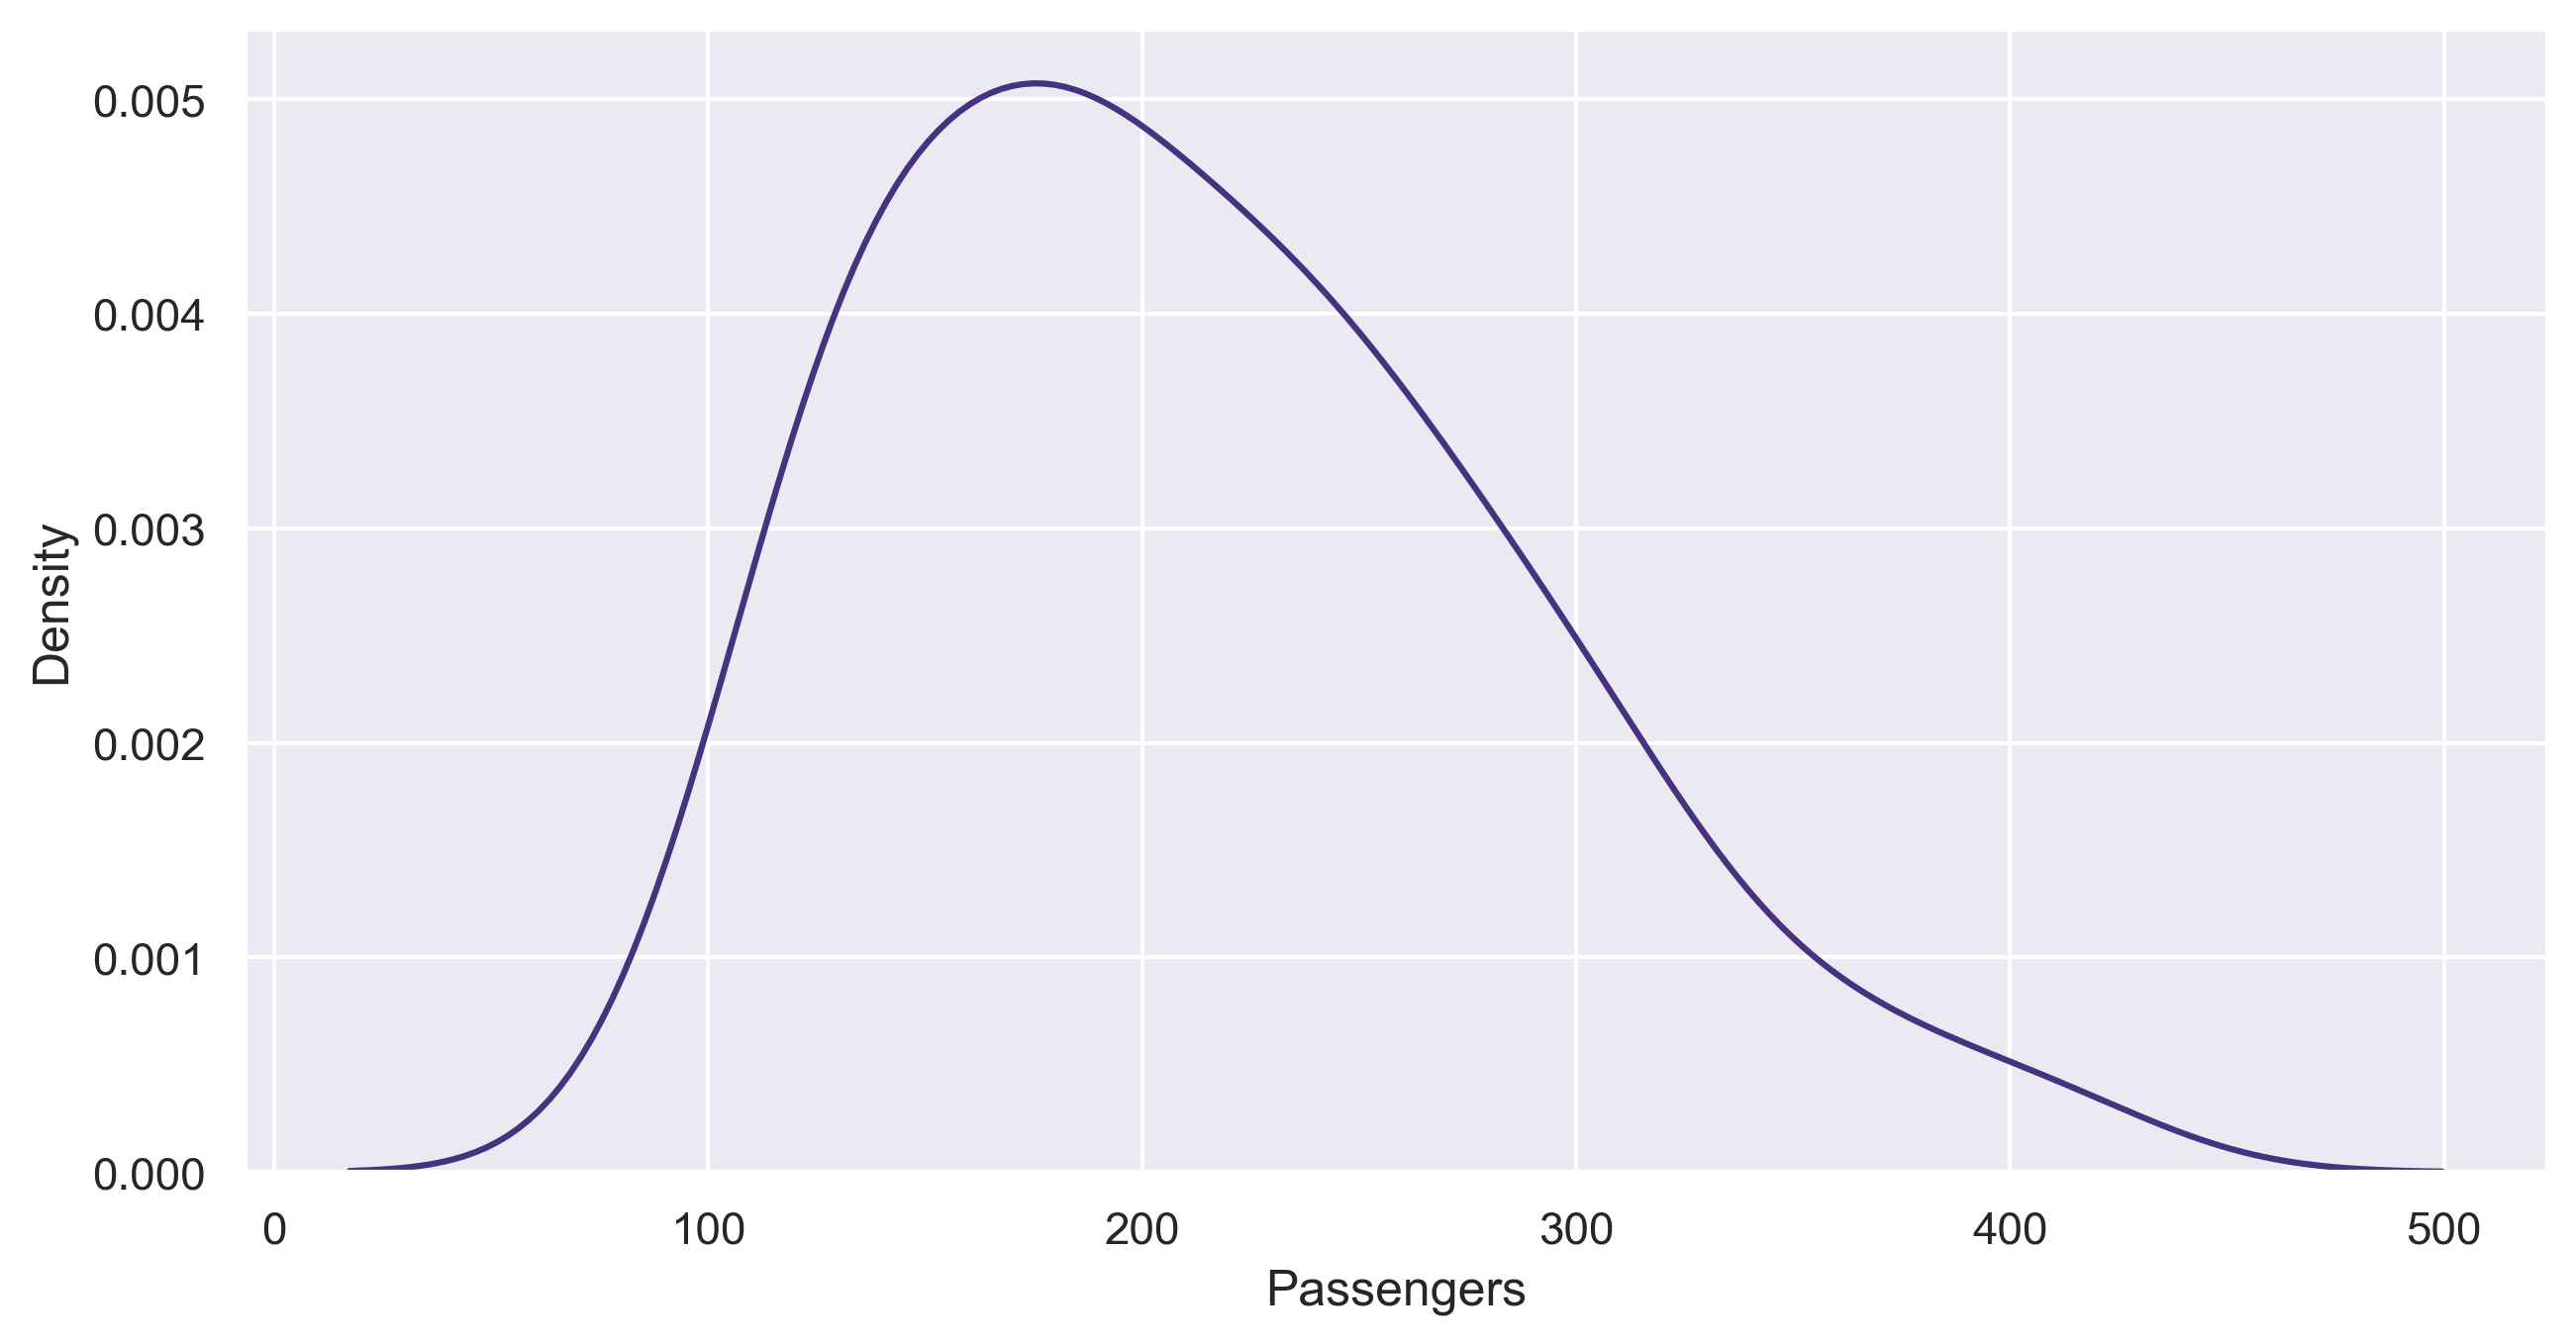

In [29]:
sns.kdeplot(data,x = data['Passengers'])       

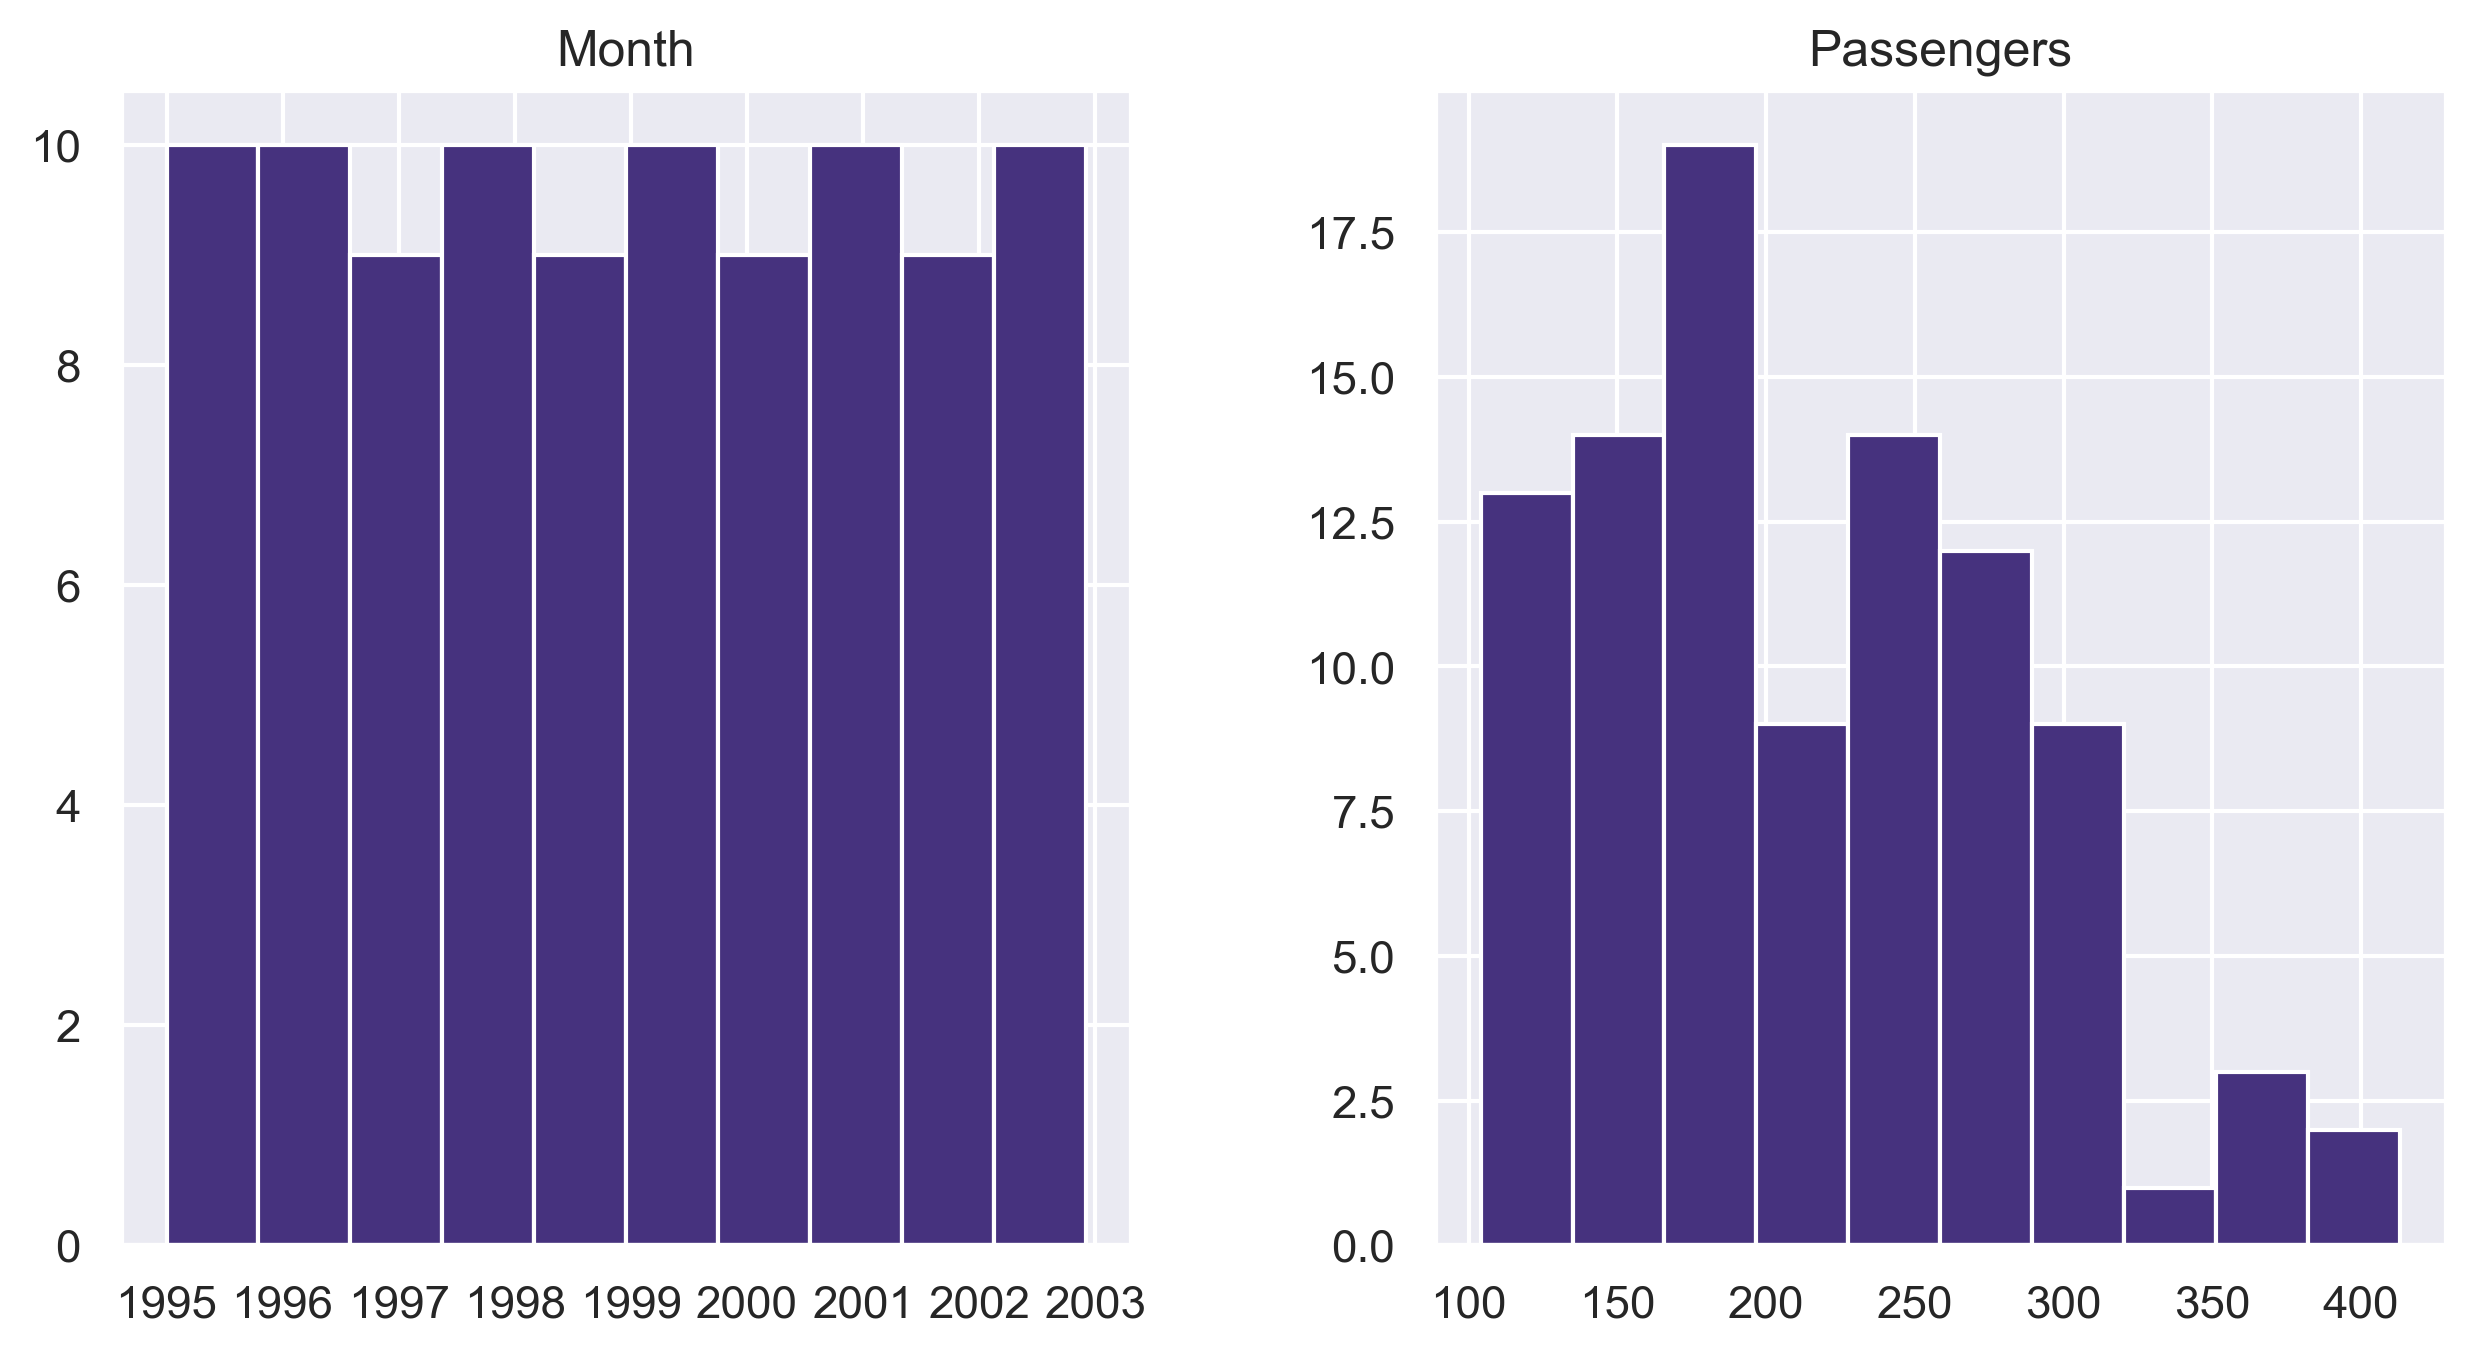

In [30]:
data.hist()
plt.show()

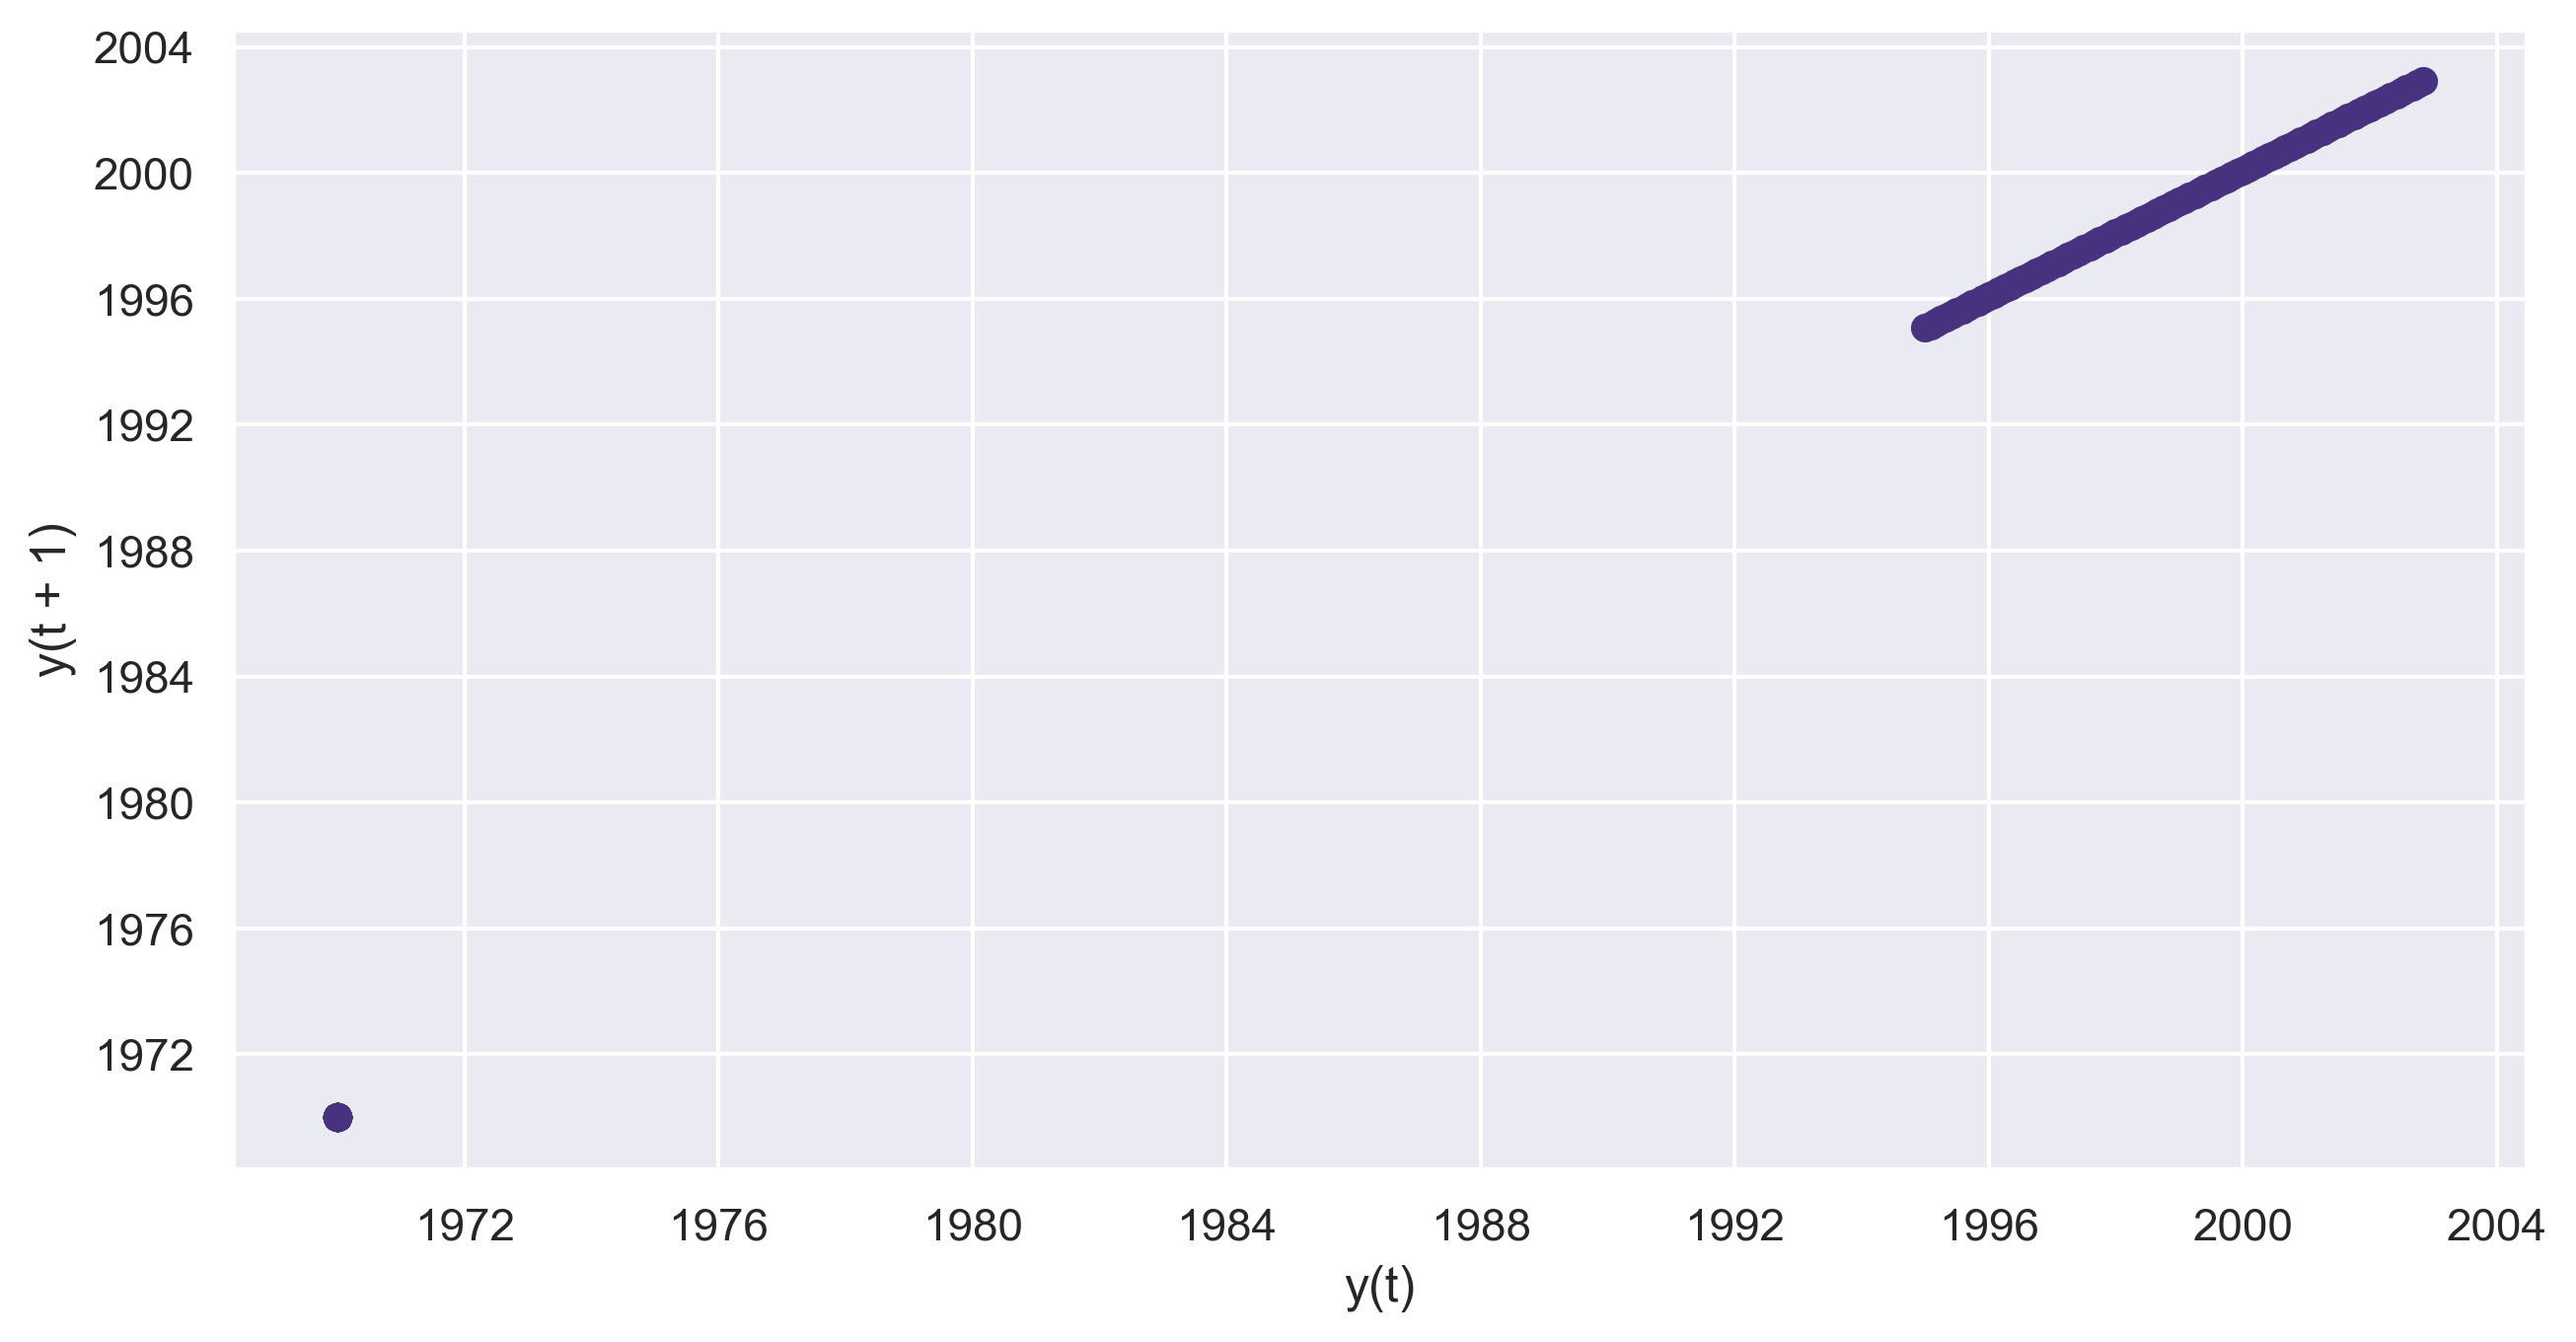

In [31]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

<Axes: >

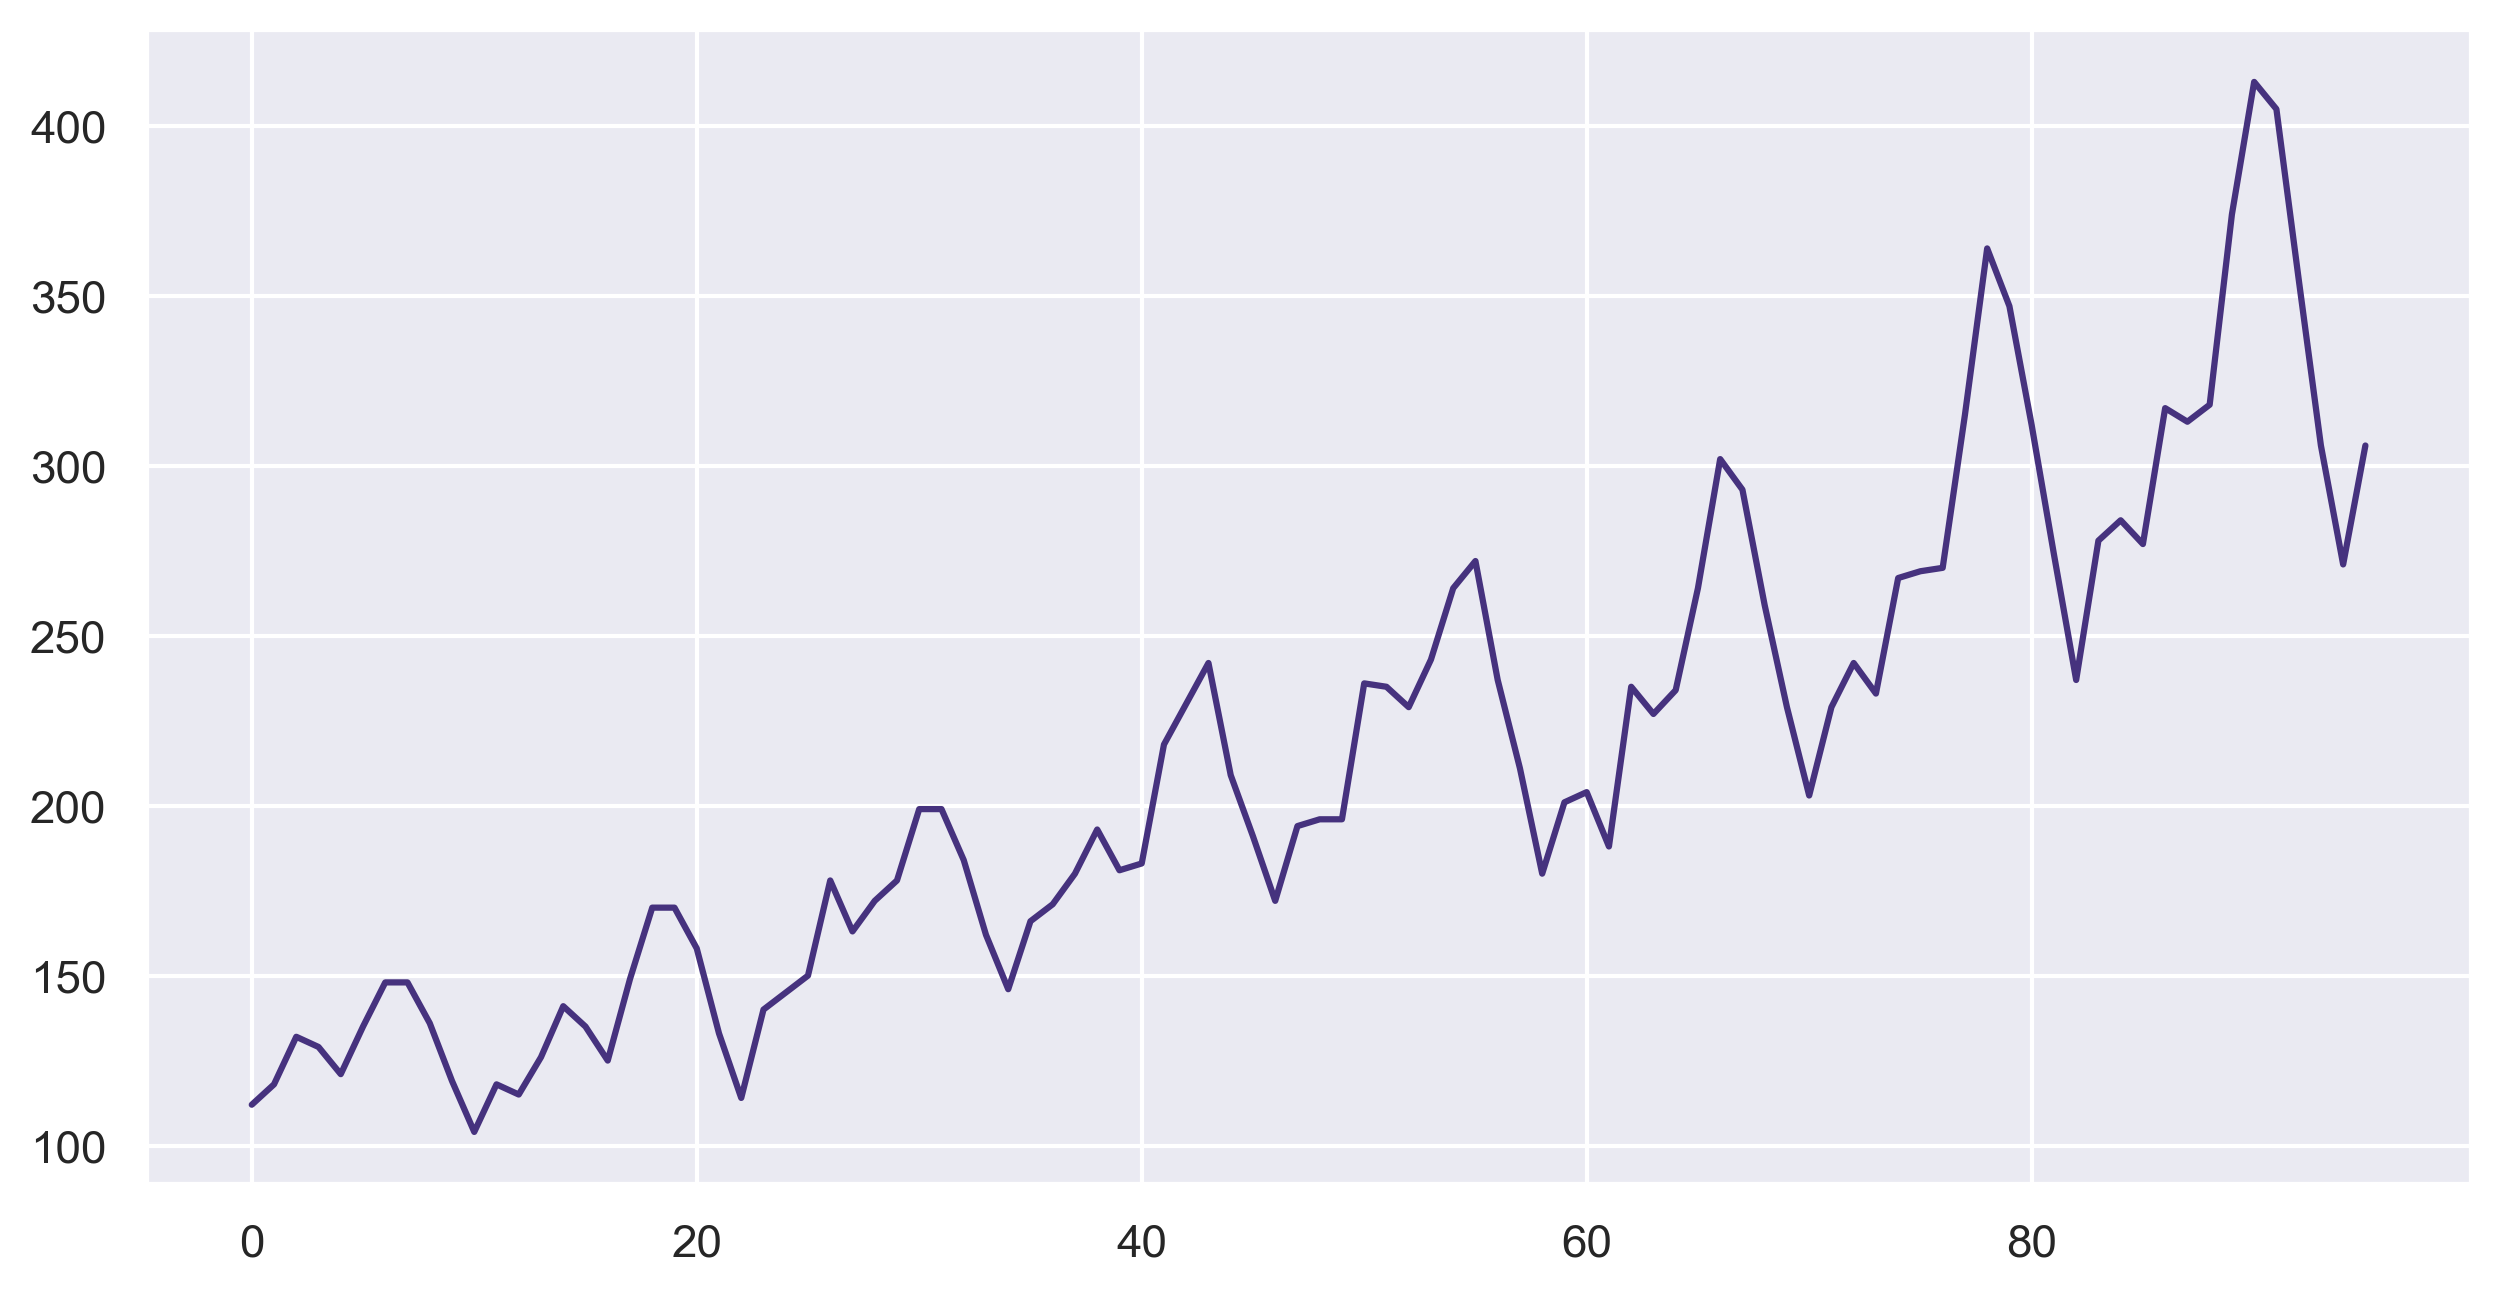

In [32]:
data.Passengers.plot()

In [33]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [34]:
data["year"] = data['Date'].dt.strftime("%Y") # year extraction
data

,Month,Passengers,Date,year
0,1995-01-01,112,1995-01-01,1995
1,1995-02-01,118,1995-02-01,1995
2,1995-03-01,132,1995-03-01,1995
3,1995-04-01,129,1995-04-01,1995
4,1995-05-01,121,1995-05-01,1995
...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002
92,2002-09-01,355,2002-09-01,2002
93,2002-10-01,306,2002-10-01,2002
94,2002-11-01,271,2002-11-01,2002


<Axes: xlabel='year', ylabel='Passengers'>

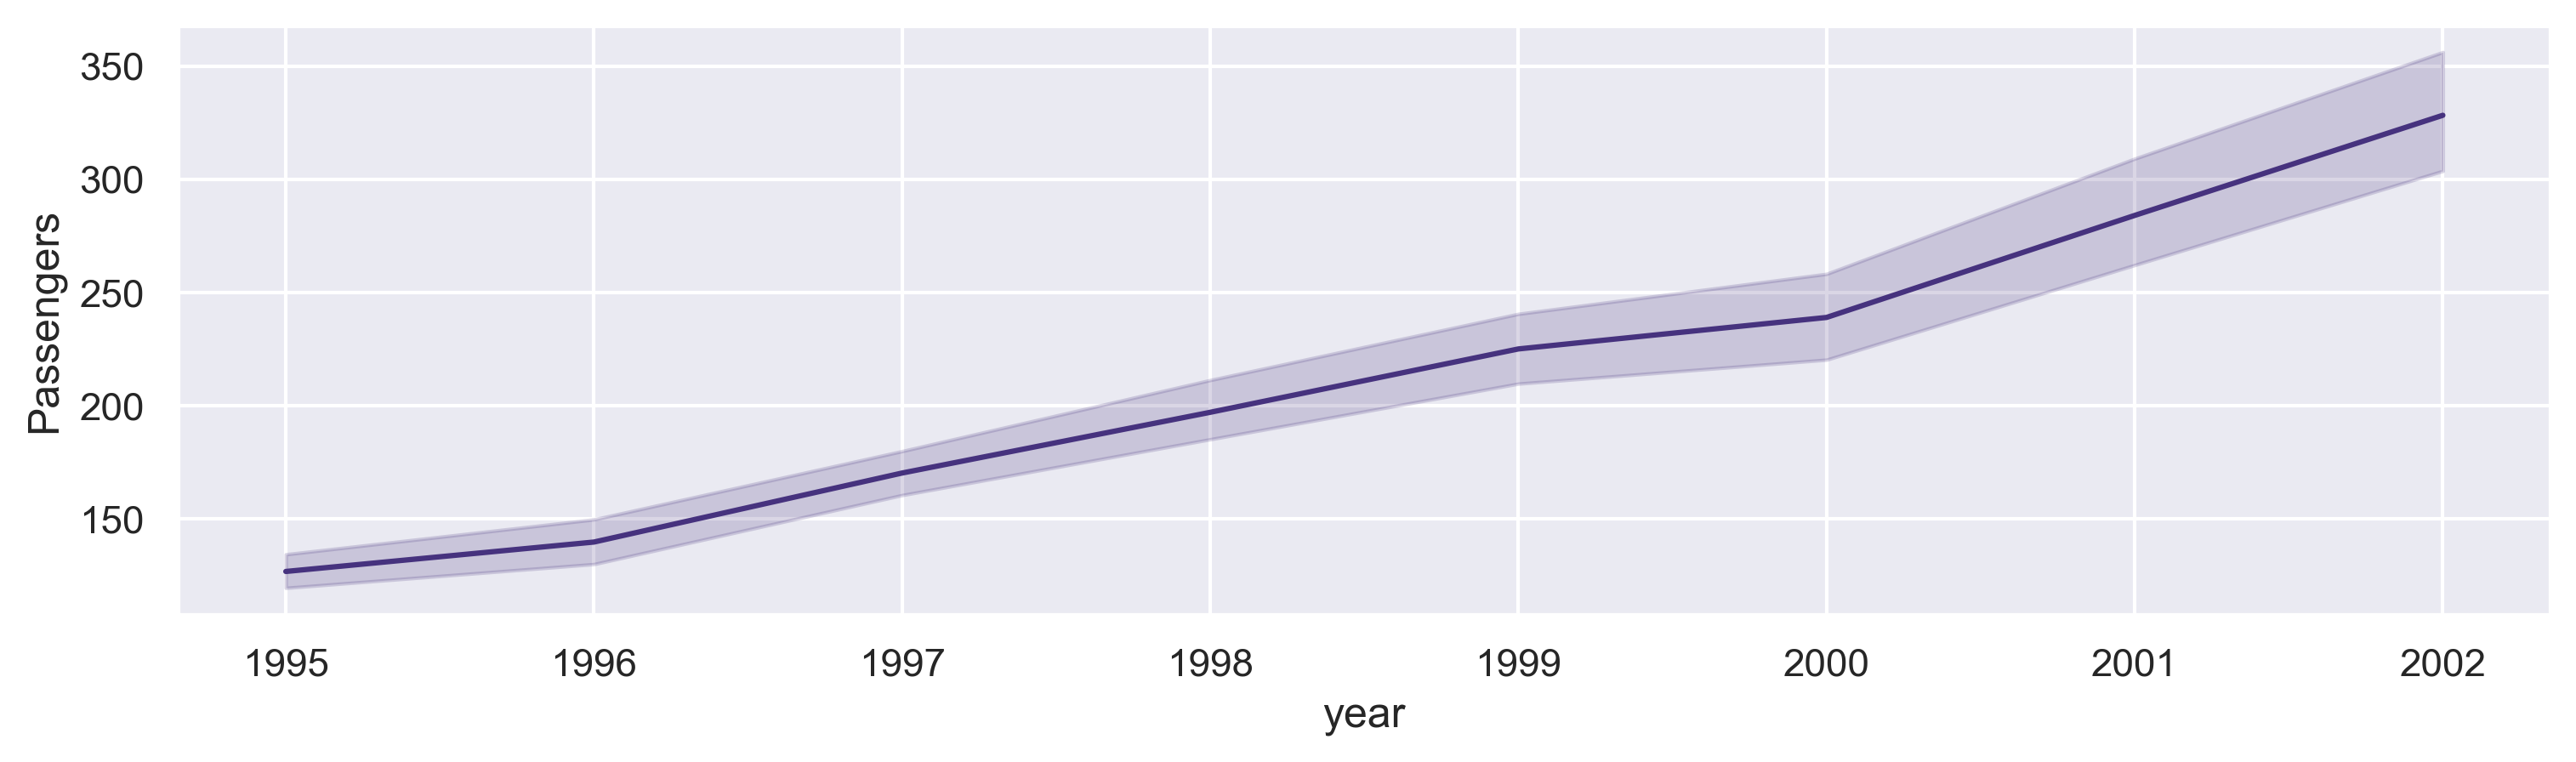

In [35]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

In [44]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
lag_acf = acf(data['Passengers'], nlags=20)
lag_pacf = pacf(data['Passengers'], nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

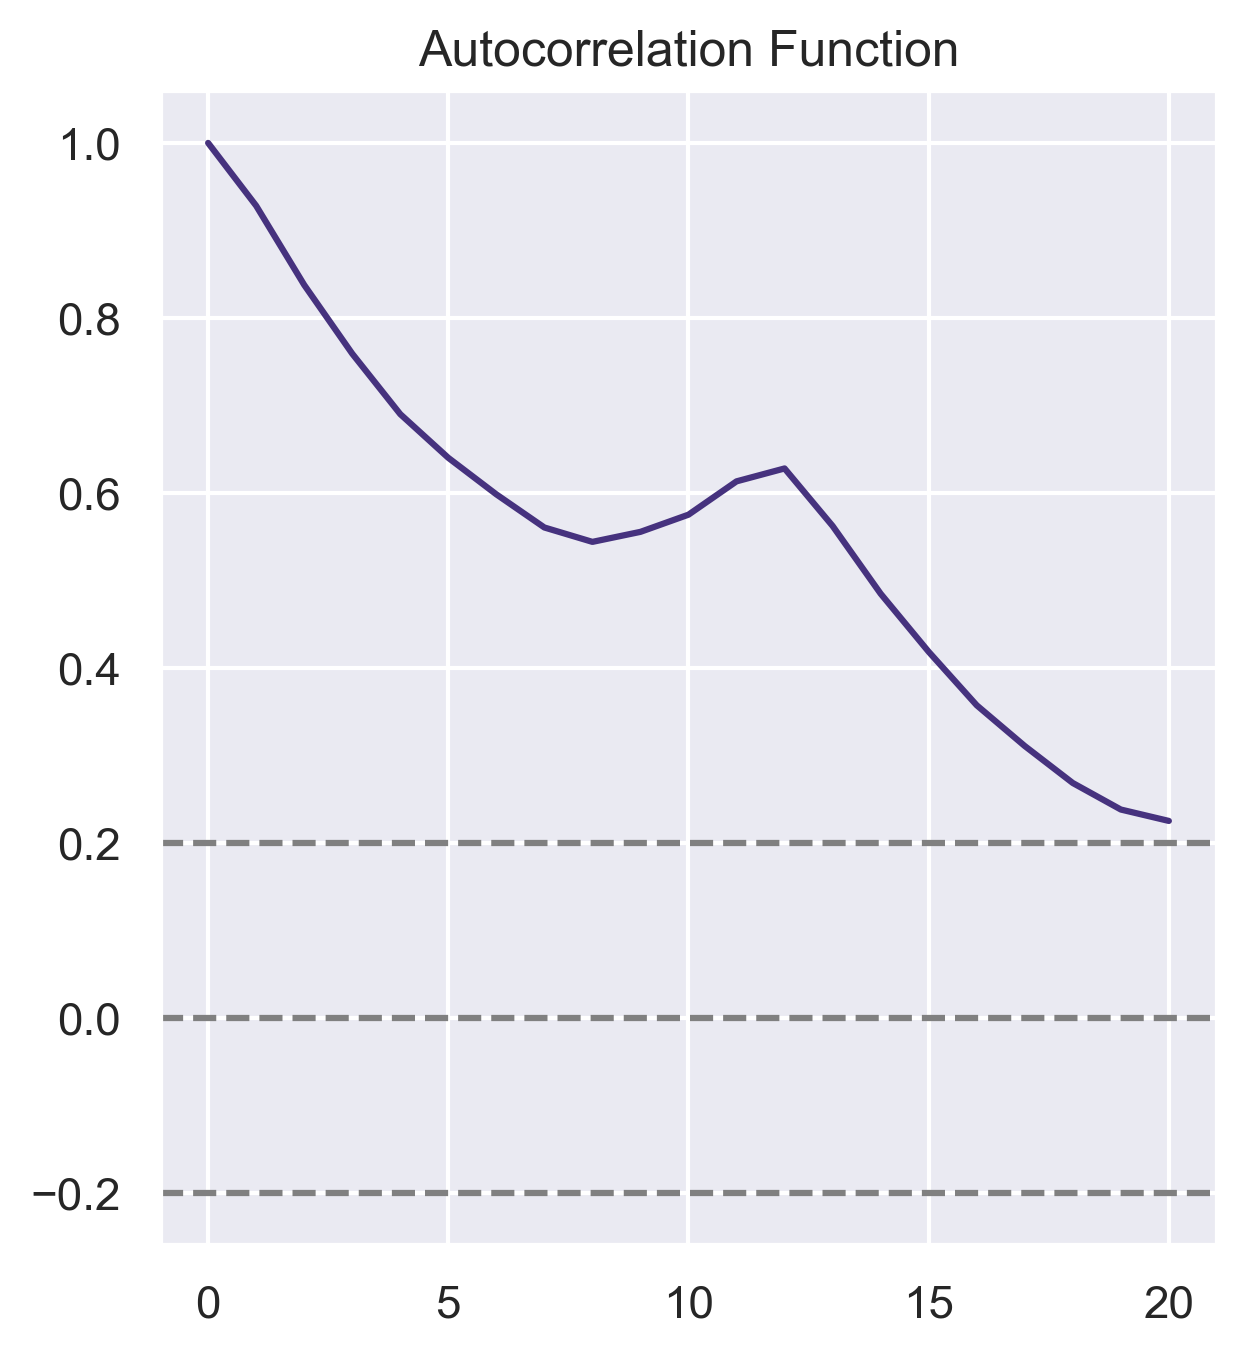

In [45]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

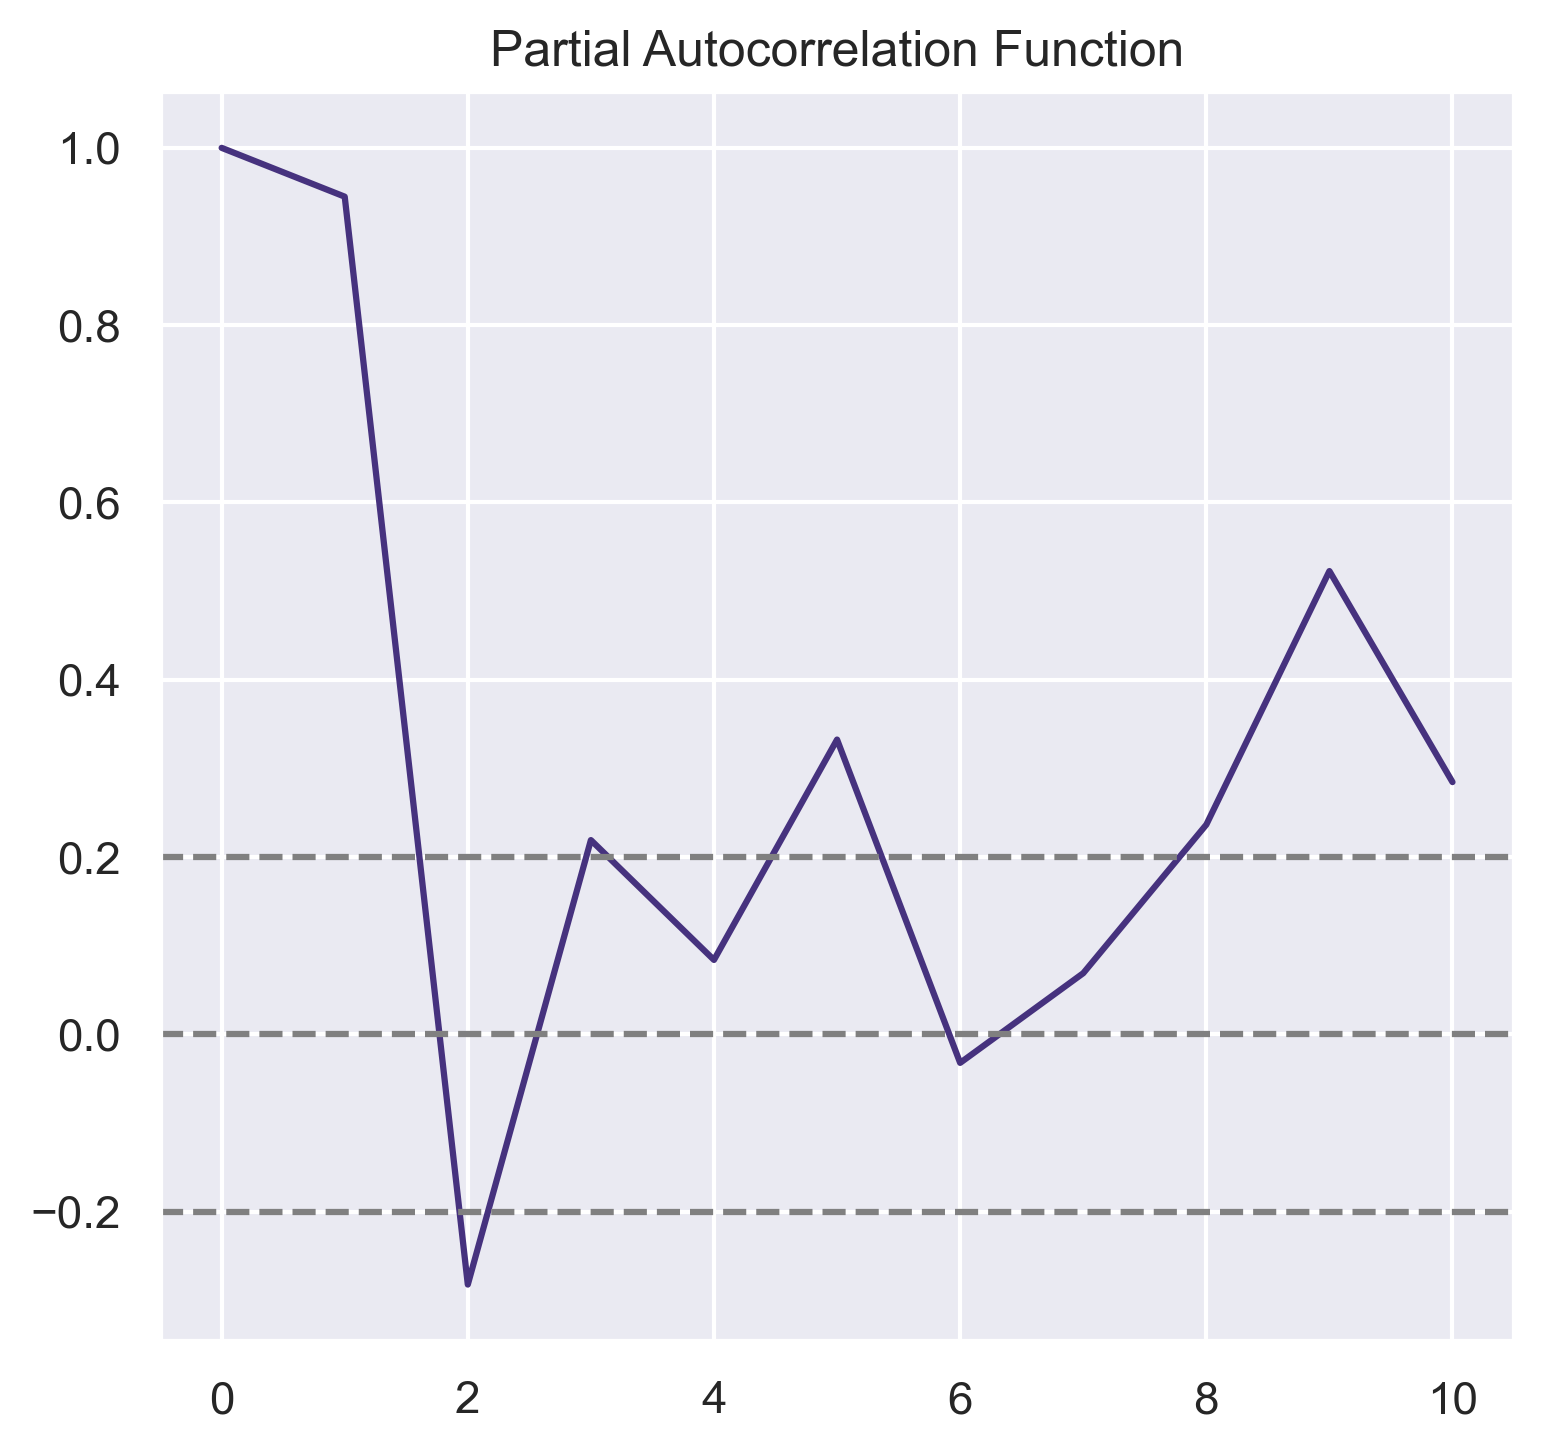

In [46]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [52]:
data['log_Passengers'] = np.log(data['Passengers'])
data

,Month,Passengers,Date,year,log_Passengers
0,1995-01-01,112,1995-01-01,1995,4.718499
1,1995-02-01,118,1995-02-01,1995,4.770685
2,1995-03-01,132,1995-03-01,1995,4.882802
3,1995-04-01,129,1995-04-01,1995,4.859812
4,1995-05-01,121,1995-05-01,1995,4.795791
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,6.003887
92,2002-09-01,355,2002-09-01,2002,5.872118
93,2002-10-01,306,2002-10-01,2002,5.723585
94,2002-11-01,271,2002-11-01,2002,5.602119


In [53]:
data['t'] = range (1 , 97)
data['t_square'] = np.square(data['t'])
data

,Month,Passengers,Date,year,log_Passengers,t,t_square
0,1995-01-01,112,1995-01-01,1995,4.718499,1,1
1,1995-02-01,118,1995-02-01,1995,4.770685,2,4
2,1995-03-01,132,1995-03-01,1995,4.882802,3,9
3,1995-04-01,129,1995-04-01,1995,4.859812,4,16
4,1995-05-01,121,1995-05-01,1995,4.795791,5,25
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,6.003887,92,8464
92,2002-09-01,355,2002-09-01,2002,5.872118,93,8649
93,2002-10-01,306,2002-10-01,2002,5.723585,94,8836
94,2002-11-01,271,2002-11-01,2002,5.602119,95,9025


In [54]:
data['year'] = data.Month.dt.strftime("%Y")
data['month'] = data.Month.dt.strftime("%b")
data

,Month,Passengers,Date,year,log_Passengers,t,t_square,month
0,1995-01-01,112,1995-01-01,1995,4.718499,1,1,Jan
1,1995-02-01,118,1995-02-01,1995,4.770685,2,4,Feb
2,1995-03-01,132,1995-03-01,1995,4.882802,3,9,Mar
3,1995-04-01,129,1995-04-01,1995,4.859812,4,16,Apr
4,1995-05-01,121,1995-05-01,1995,4.795791,5,25,May
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,6.003887,92,8464,Aug
92,2002-09-01,355,2002-09-01,2002,5.872118,93,8649,Sep
93,2002-10-01,306,2002-10-01,2002,5.723585,94,8836,Oct
94,2002-11-01,271,2002-11-01,2002,5.602119,95,9025,Nov


In [55]:
data1 = pd.get_dummies(data['month']).astype('int')
data1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
data = pd.concat([data , data1] , axis=1)
data

,Month,Passengers,Date,year,log_Passengers,t,t_square,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,1995,4.718499,1,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,4.770685,2,4,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,4.882802,3,9,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4.859812,4,16,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,4.795791,5,25,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,2002,6.003887,92,8464,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002-09-01,2002,5.872118,93,8649,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002-10-01,2002,5.723585,94,8836,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002-11-01,2002,5.602119,95,9025,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
Train = data.head(71)
Test = data.tail(25)
Train

,Month,Passengers,Date,year,log_Passengers,t,t_square,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,1995,4.718499,1,1,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,4.770685,2,4,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,4.882802,3,9,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4.859812,4,16,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,4.795791,5,25,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2000-11-01,203,2000-11-01,2000,5.313206,71,5041,Nov,0,0,0,0,0,0,0,0,0,1,0,0
71,2000-12-01,229,2000-12-01,2000,5.433722,72,5184,Dec,0,0,1,0,0,0,0,0,0,0,0,0
72,2001-01-01,242,2001-01-01,2001,5.488938,73,5329,Jan,0,0,0,0,1,0,0,0,0,0,0,0
73,2001-02-01,233,2001-02-01,2001,5.451038,74,5476,Feb,0,0,0,1,0,0,0,0,0,0,0,0


In [59]:
Test

,Month,Passengers,Date,year,log_Passengers,t,t_square,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
75,2001-04-01,269,2001-04-01,2001,5.594711,76,5776,Apr,1,0,0,0,0,0,0,0,0,0,0,0
76,2001-05-01,270,2001-05-01,2001,5.598422,77,5929,May,0,0,0,0,0,0,0,0,1,0,0,0
77,2001-06-01,315,2001-06-01,2001,5.752573,78,6084,Jun,0,0,0,0,0,0,1,0,0,0,0,0
78,2001-07-01,364,2001-07-01,2001,5.897154,79,6241,Jul,0,0,0,0,0,1,0,0,0,0,0,0
79,2001-08-01,347,2001-08-01,2001,5.849325,80,6400,Aug,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,2001-09-01,2001,5.743003,81,6561,Sep,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,2001-10-01,2001,5.613128,82,6724,Oct,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,2001-11-01,2001,5.468060,83,6889,Nov,0,0,0,0,0,0,0,0,0,1,0,0
83,2001-12-01,278,2001-12-01,2001,5.627621,84,7056,Dec,0,0,1,0,0,0,0,0,0,0,0,0
84,2002-01-01,284,2002-01-01,2002,5.648974,85,7225,Jan,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_squared_error

In [62]:
linear_model = smf.ols('Passengers~t' , data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Passengers'] , pred_linear))
rmse_linear

56.02331097092629

In [63]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp))
rmse_Exp

312.18605087592175

In [65]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea))
rmse_add_sea

131.17859681761576

In [66]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Passengers'], pred_add_sea_quad))
rmse_add_sea_quad

39.79556149955843

In [67]:

#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['log_Passengers'], pred_Mult_add_sea))
rmse_Mult_add_sea 

0.03210012149629141

In [68]:
Table = pd.DataFrame({'Actual': Test['log_Passengers'] , 'Predicted': pred_Mult_add_sea})
Table

,Actual,Predicted
75,5.594711,5.622453
76,5.598422,5.610496
77,5.752573,5.722893
78,5.897154,5.823936
79,5.849325,5.832346
80,5.743003,5.725043
81,5.613128,5.597962
82,5.468060,5.468450
83,5.627621,5.603675
84,5.648974,5.627257


In [69]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
5,rmse_Mult_sea,0.032100
4,rmse_add_sea_quad,39.795561
0,rmse_linear,56.023311
2,rmse_Quad,58.491135
3,rmse_add_sea,131.178597
1,rmse_Exp,312.186051


<Axes: xlabel='MODEL', ylabel='RMSE_Values'>

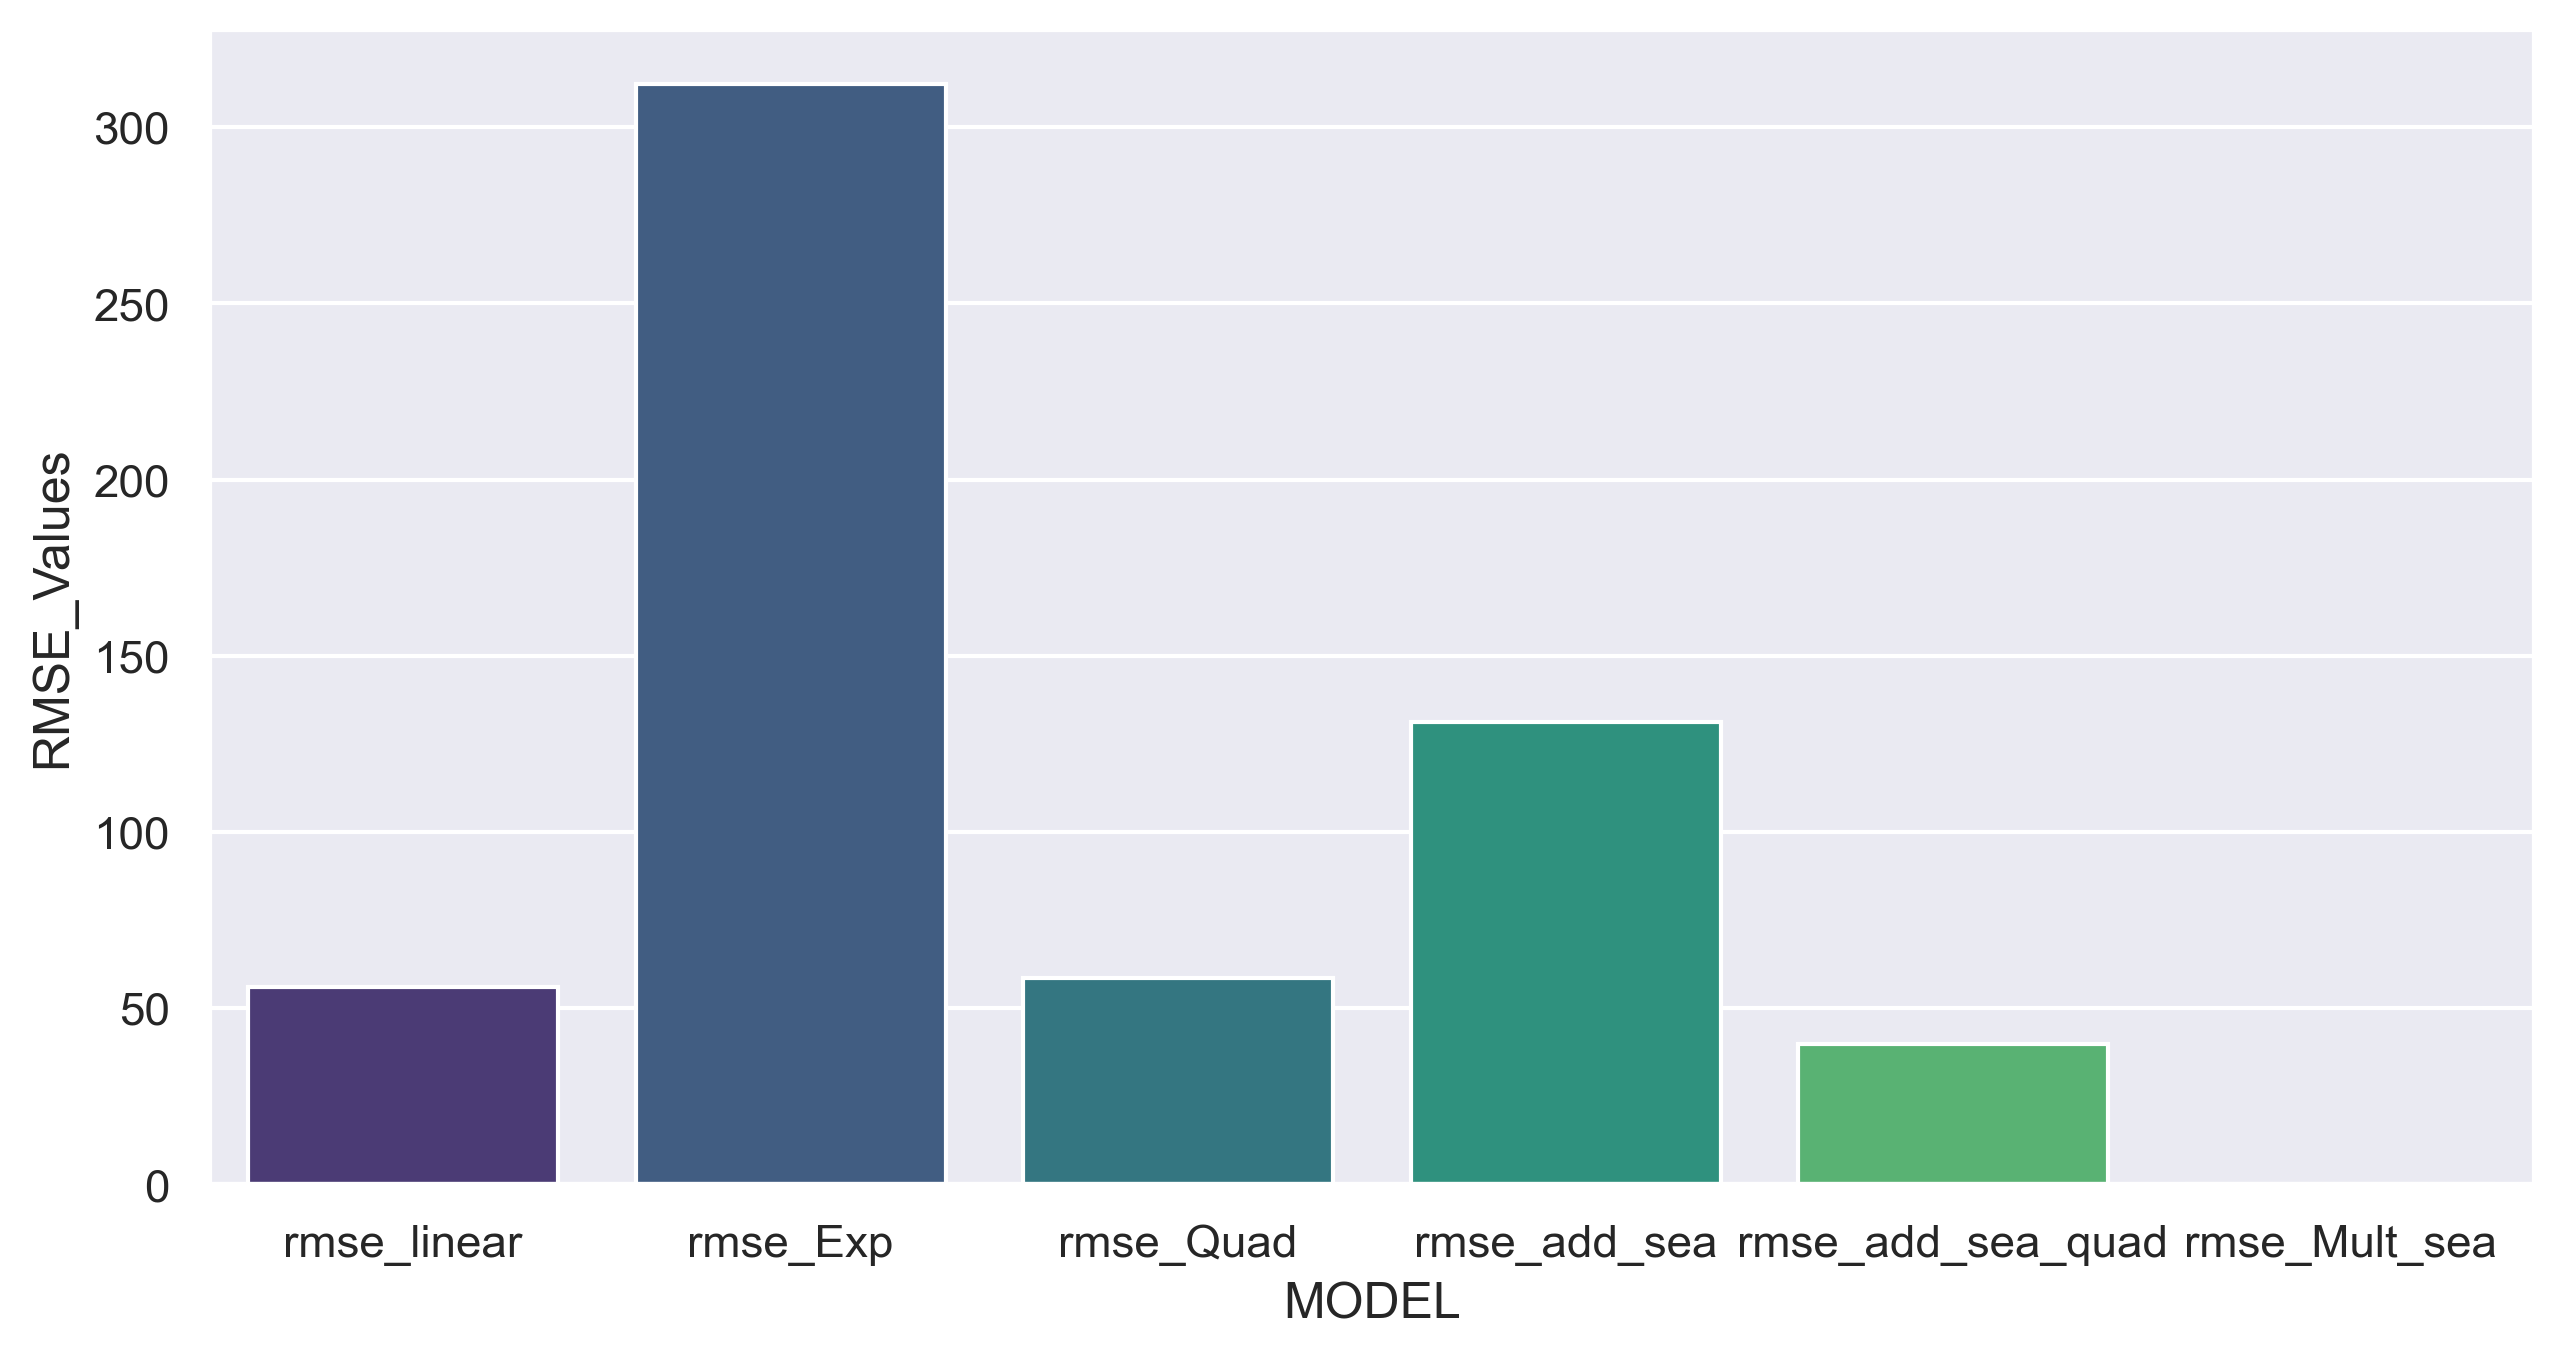

In [70]:
sns.barplot(x=table_rmse['MODEL'] , y = table_rmse['RMSE_Values'] )

## Cococola data

In [73]:
df = pd.read_excel(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [75]:
df.shape

(42, 2)

In [76]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<Axes: xlabel='Sales', ylabel='Density'>

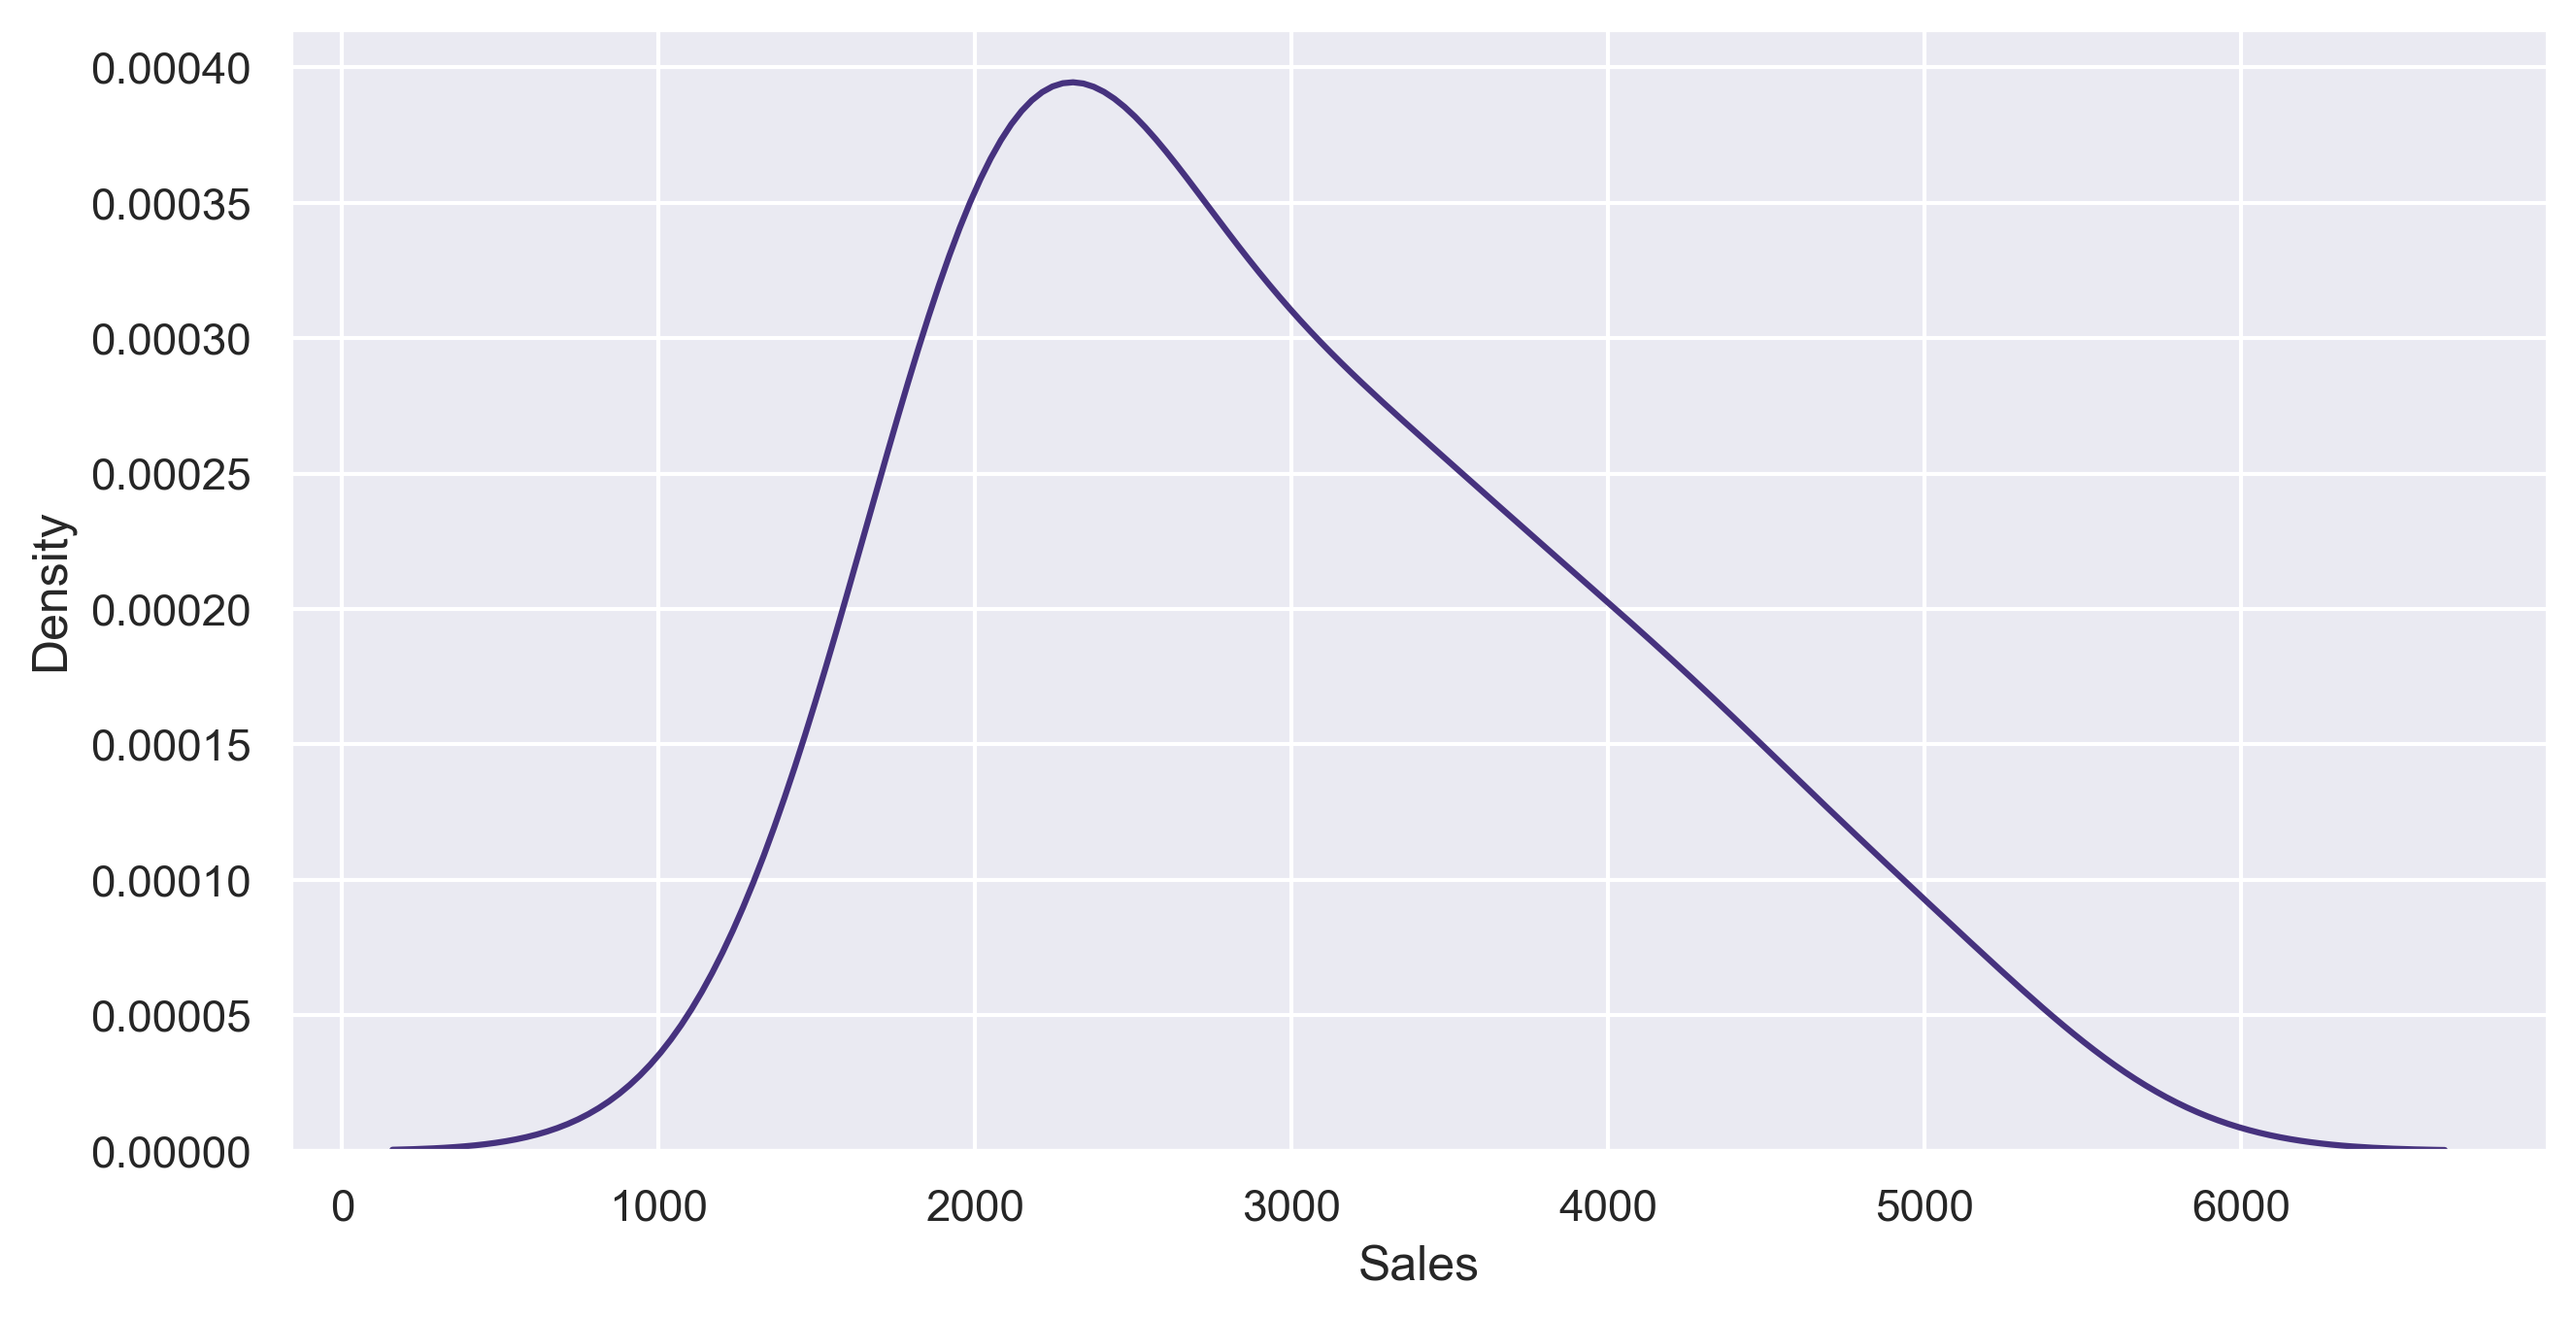

In [77]:
sns.kdeplot(df,x = df['Sales'])  

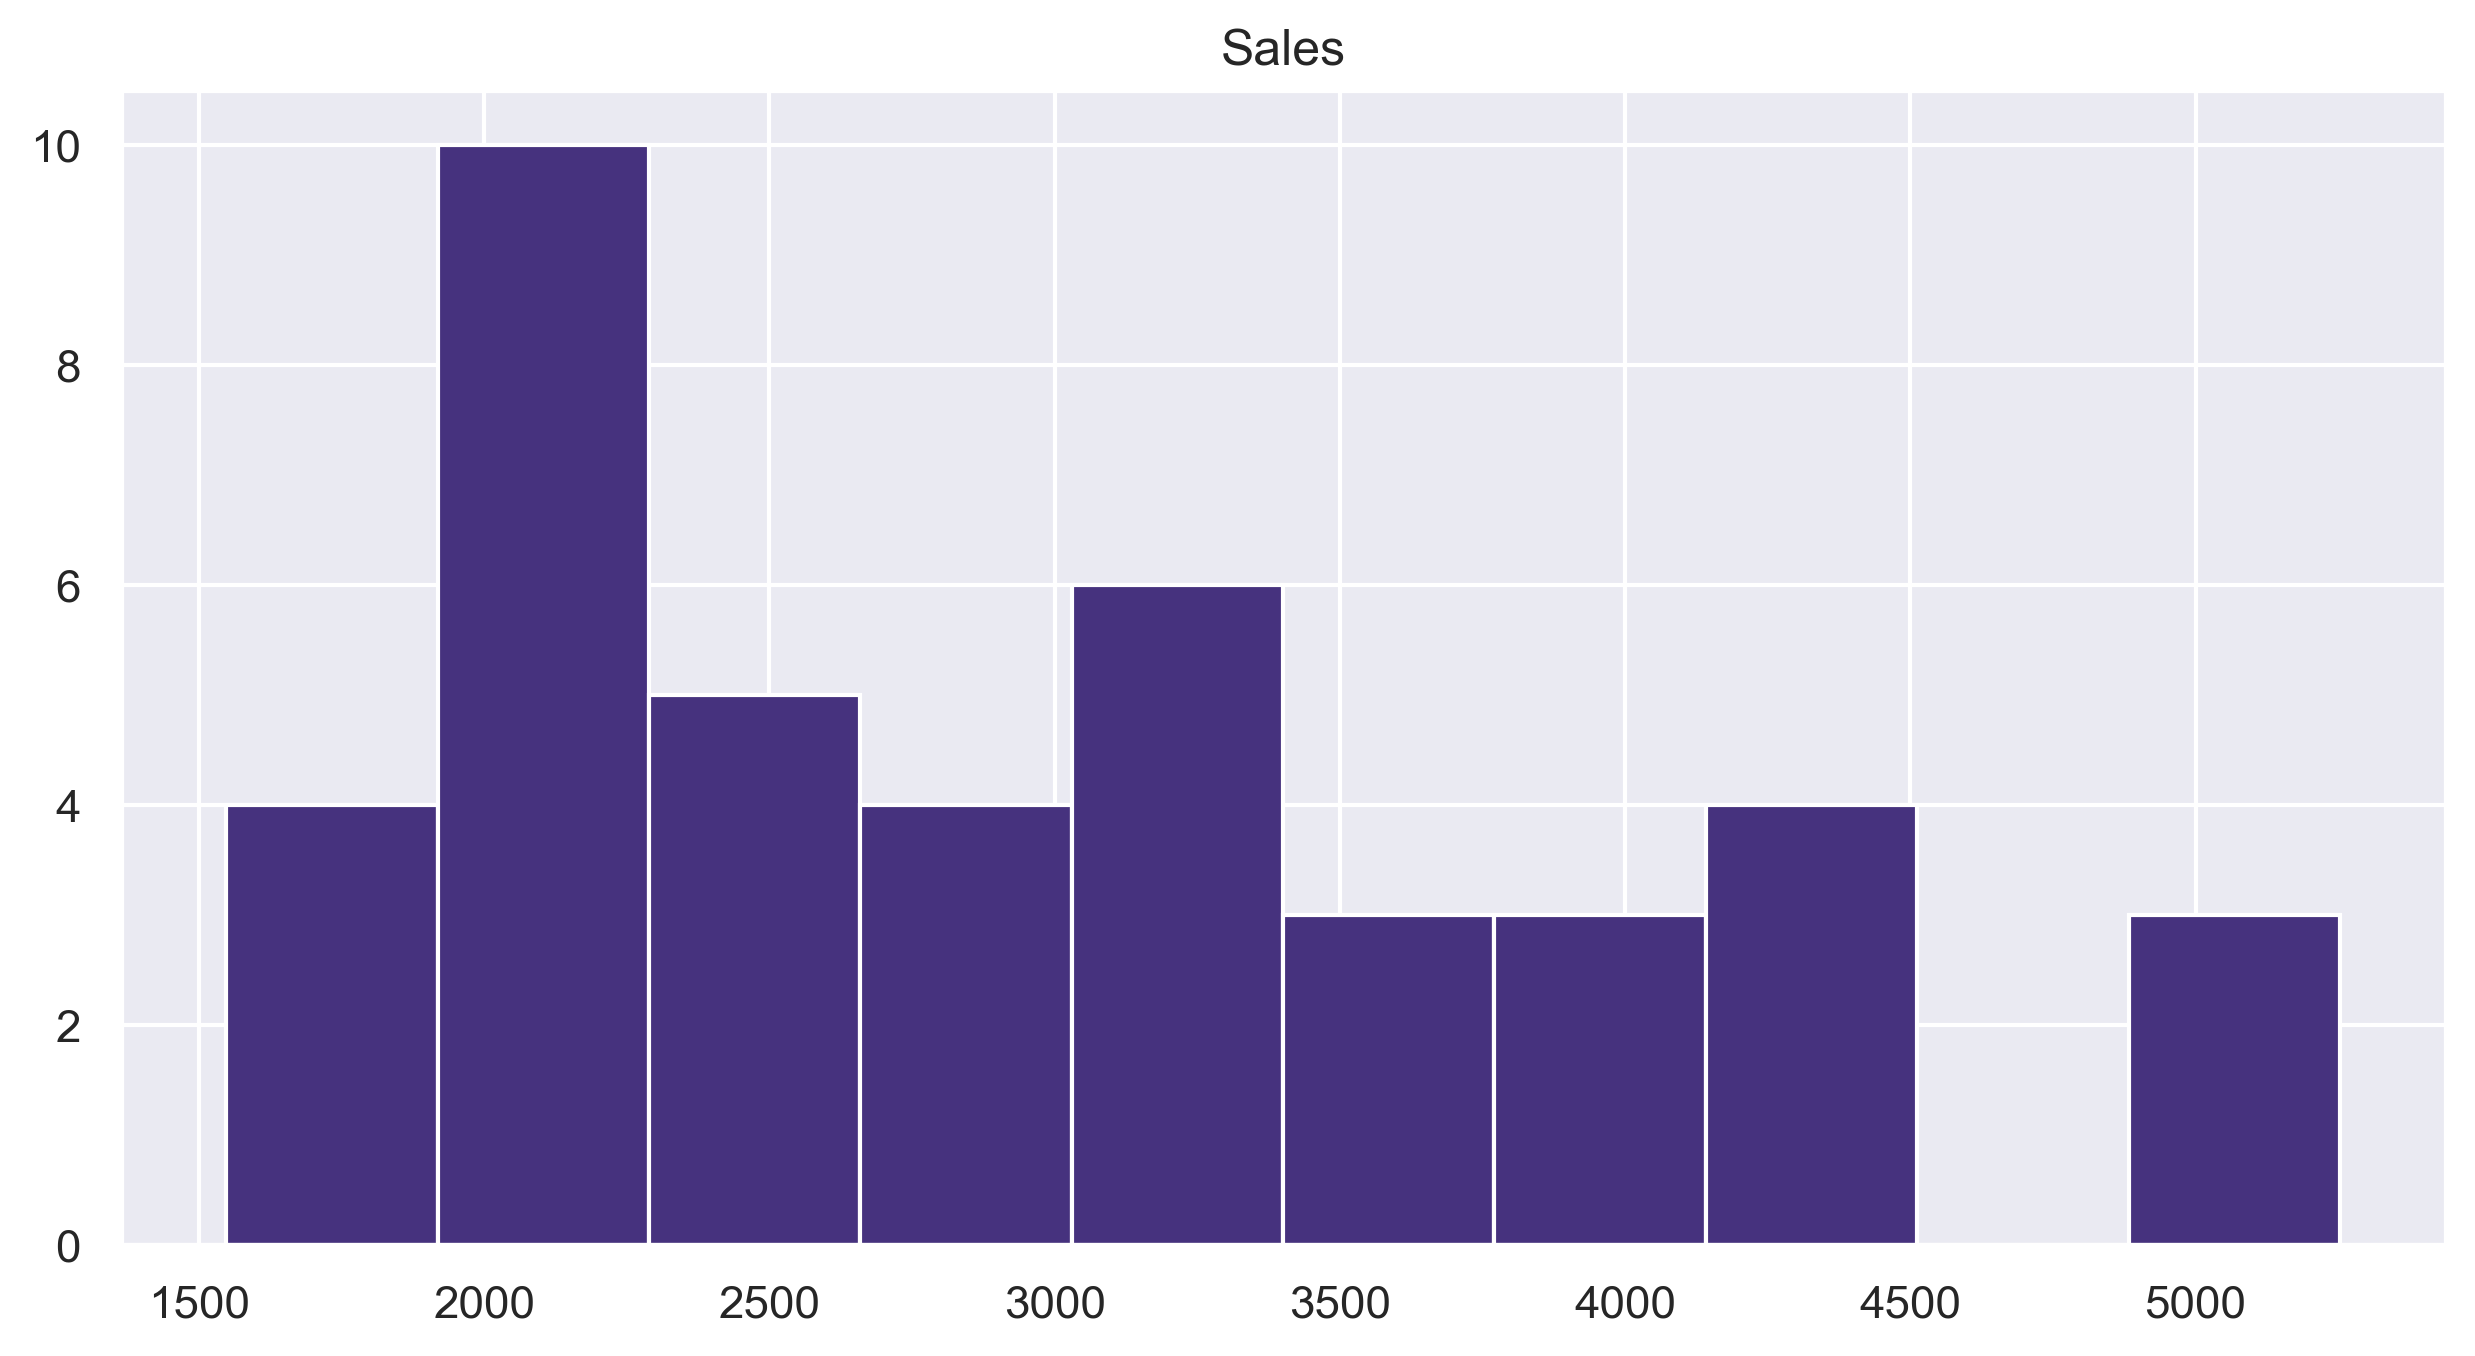

In [78]:
df.hist()
plt.show()

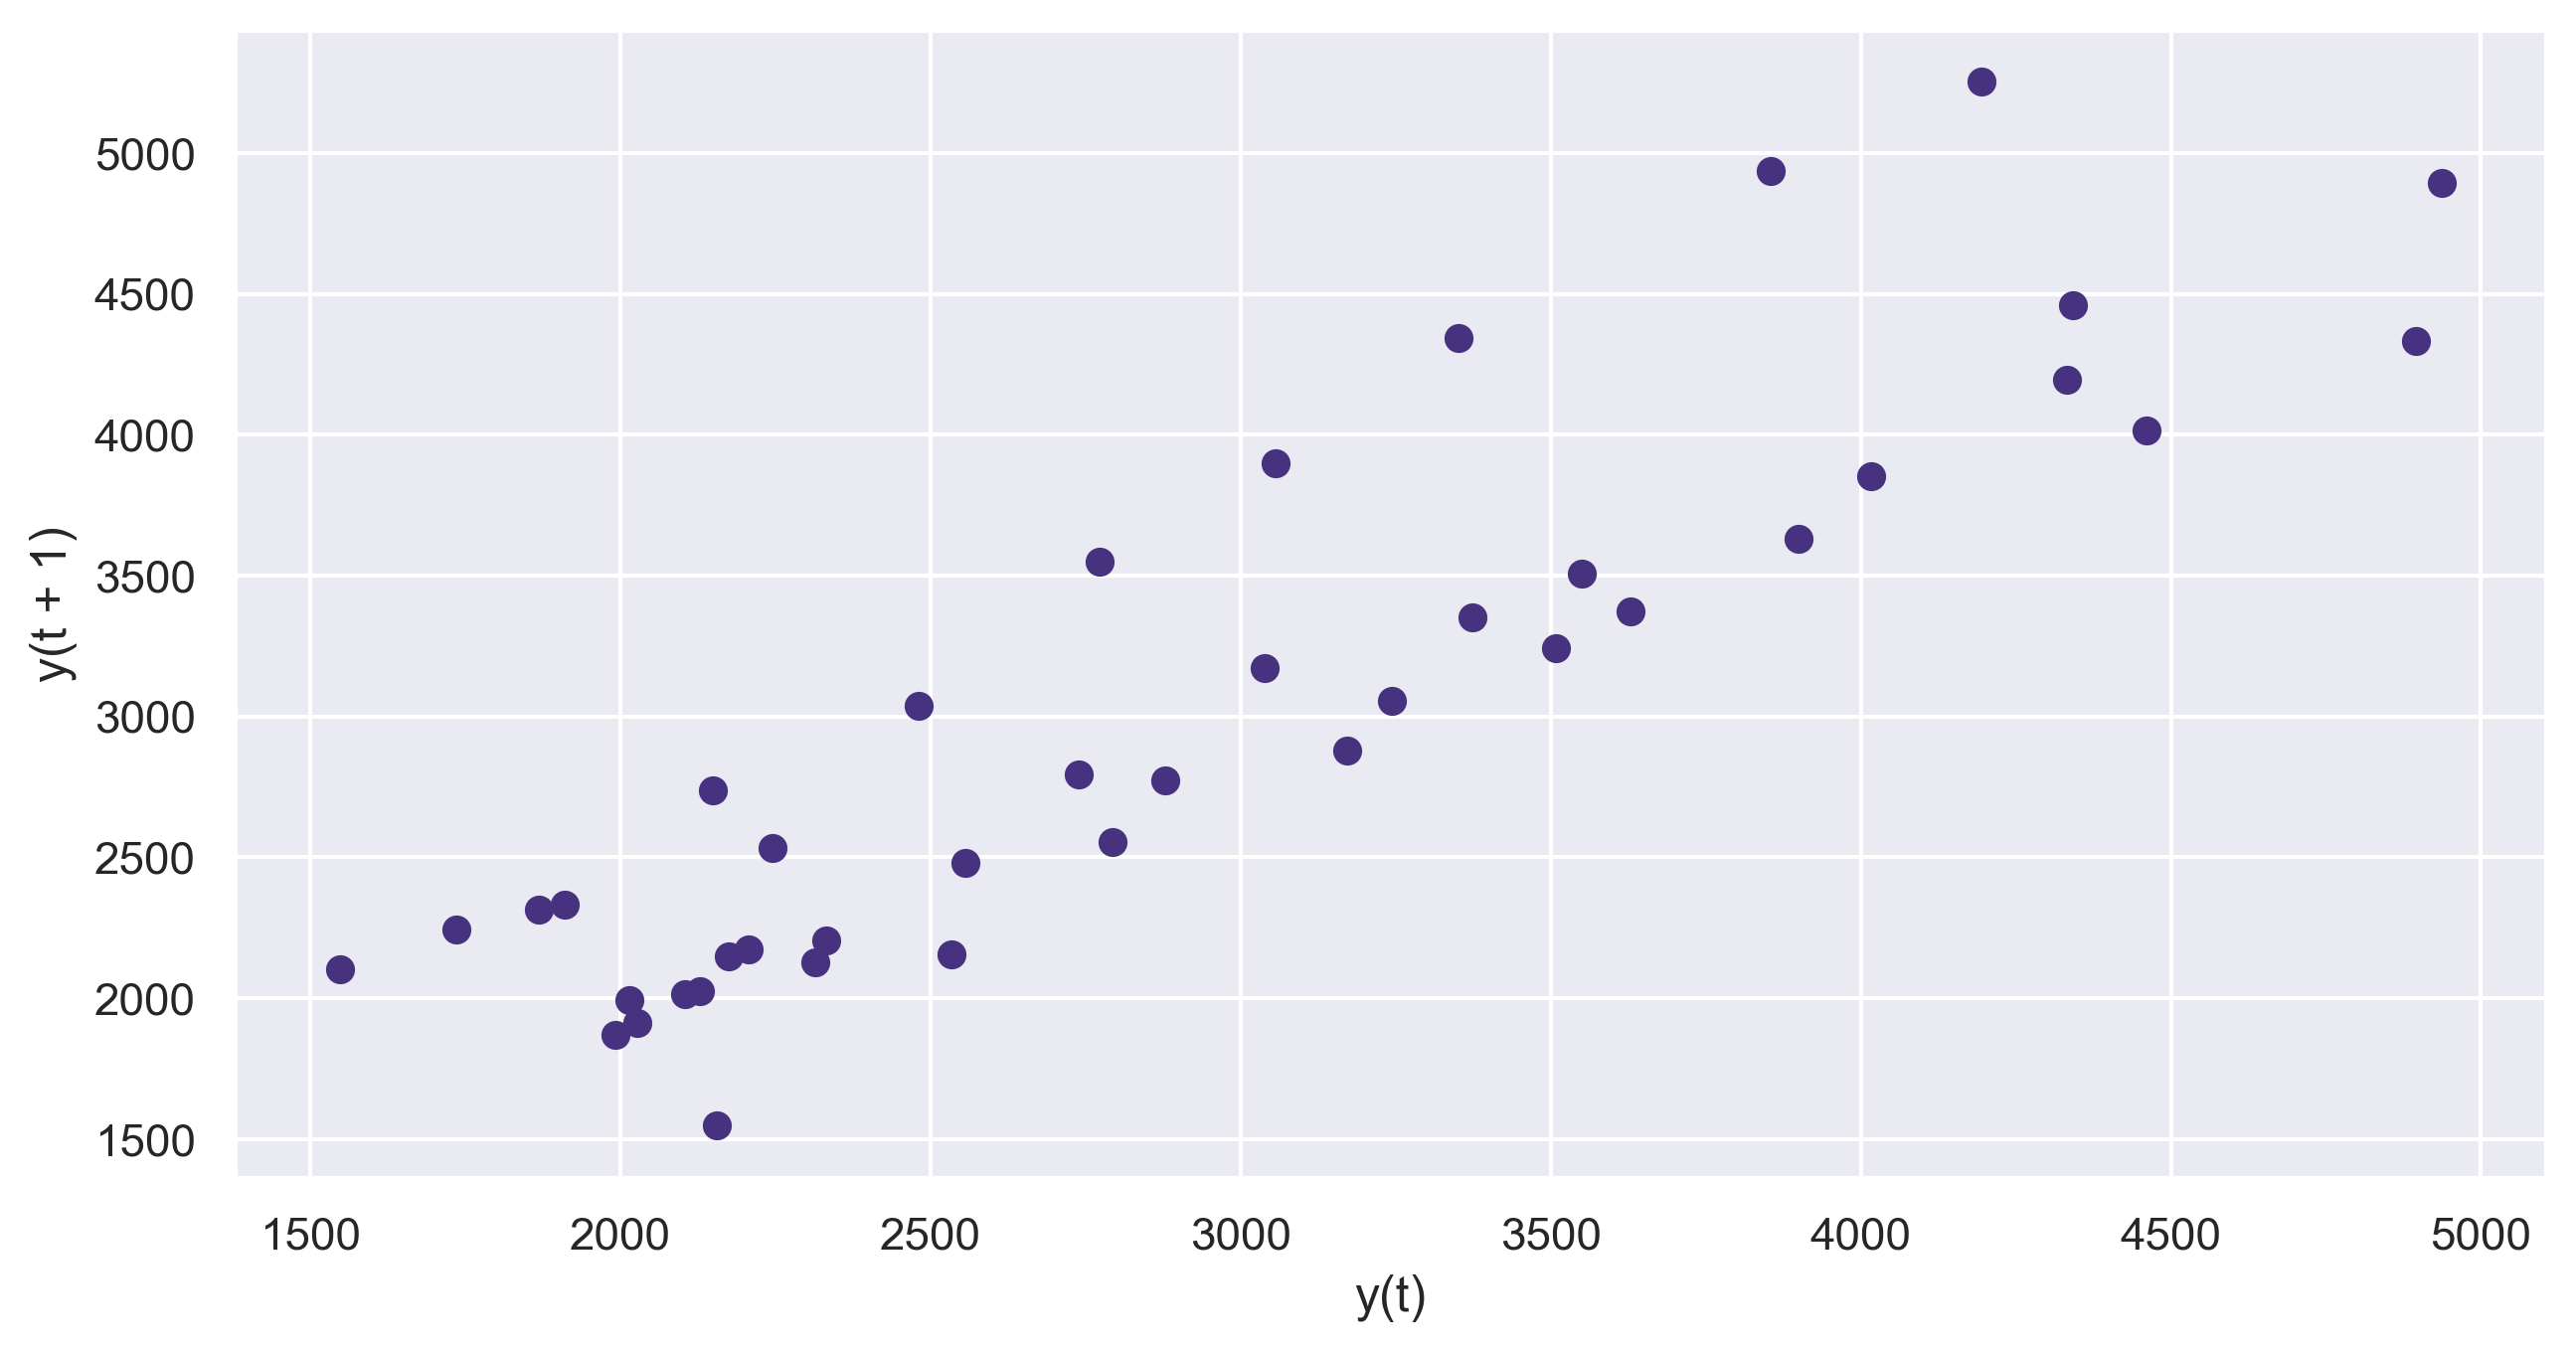

In [82]:
lag_plot(df['Sales'])
plt.show()

<Axes: >

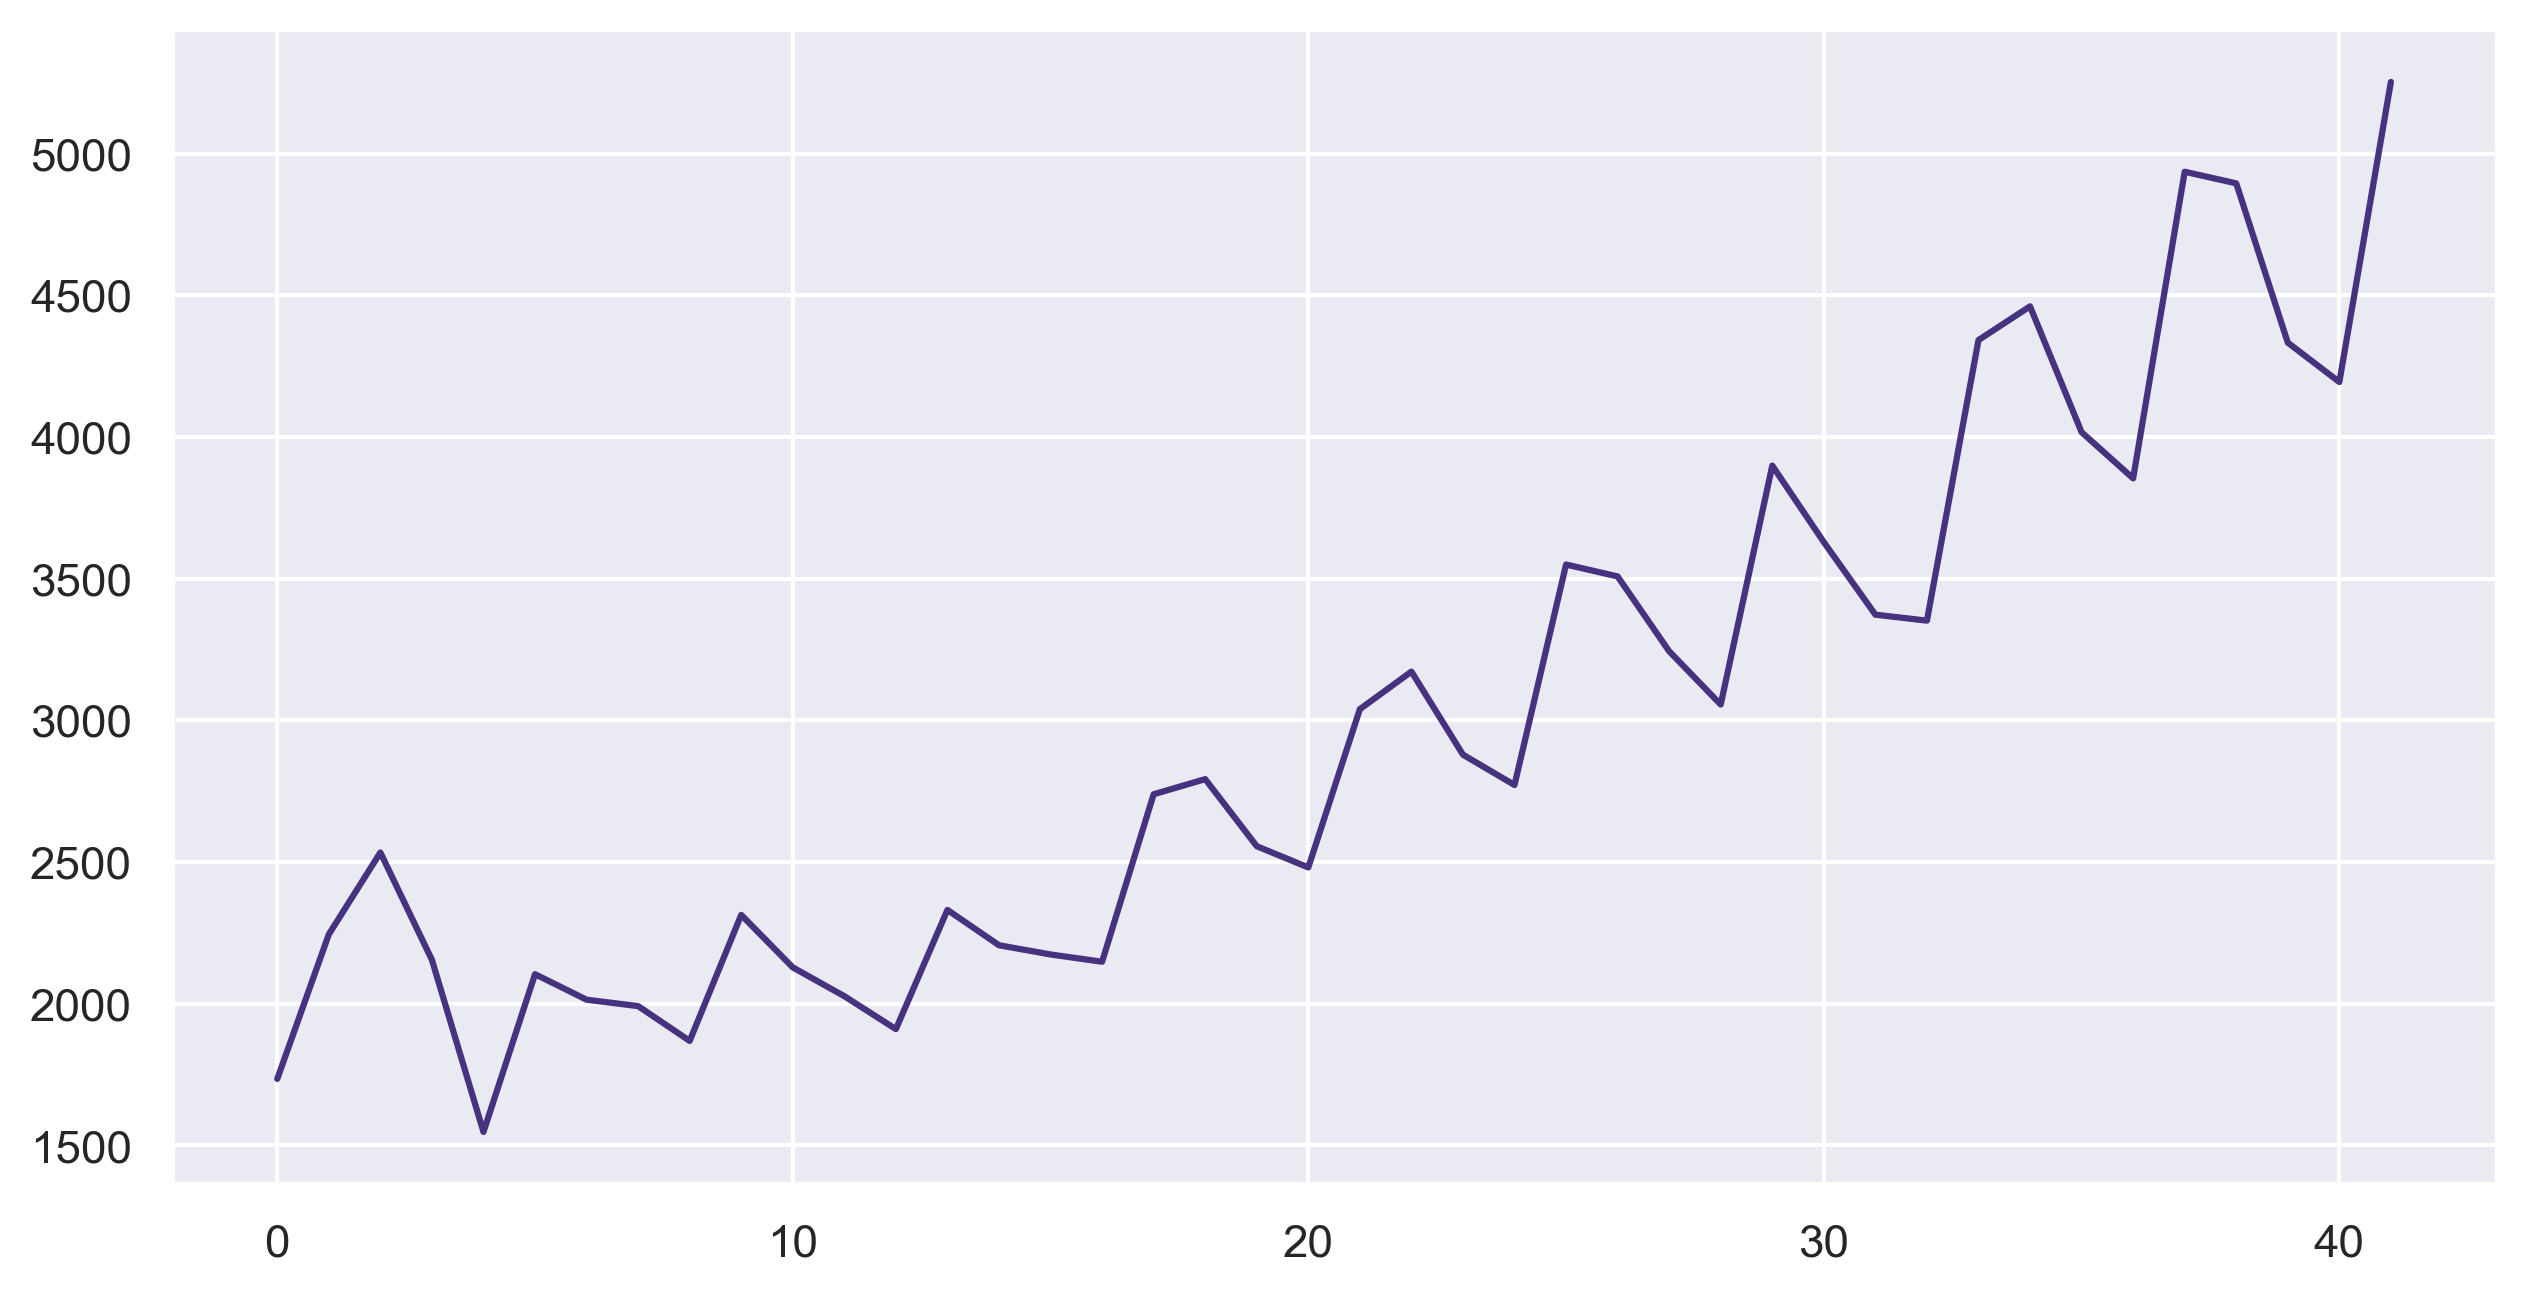

In [84]:
df.Sales.plot()

In [85]:
df['t'] = range(1 , 43)
df

,Quarter,Sales,t
0,Q1_86,1734.827000,1
1,Q2_86,2244.960999,2
2,Q3_86,2533.804993,3
3,Q4_86,2154.962997,4
4,Q1_87,1547.818996,5
5,Q2_87,2104.411995,6
6,Q3_87,2014.362999,7
7,Q4_87,1991.746998,8
8,Q1_88,1869.049999,9
9,Q2_88,2313.631996,10


In [86]:
df['log_Sales'] = np.log(df['Sales'])
df.head()

,Quarter,Sales,t,log_Sales
0,Q1_86,1734.827000,1,7.458663
1,Q2_86,2244.960999,2,7.716443
2,Q3_86,2533.804993,3,7.837477
3,Q4_86,2154.962997,4,7.675529
4,Q1_87,1547.818996,5,7.344602


In [87]:
df['t_square'] = np.square(df['t'])
df.head()

,Quarter,Sales,t,log_Sales,t_square
0,Q1_86,1734.827000,1,7.458663,1
1,Q2_86,2244.960999,2,7.716443,4
2,Q3_86,2533.804993,3,7.837477,9
3,Q4_86,2154.962997,4,7.675529,16
4,Q1_87,1547.818996,5,7.344602,25


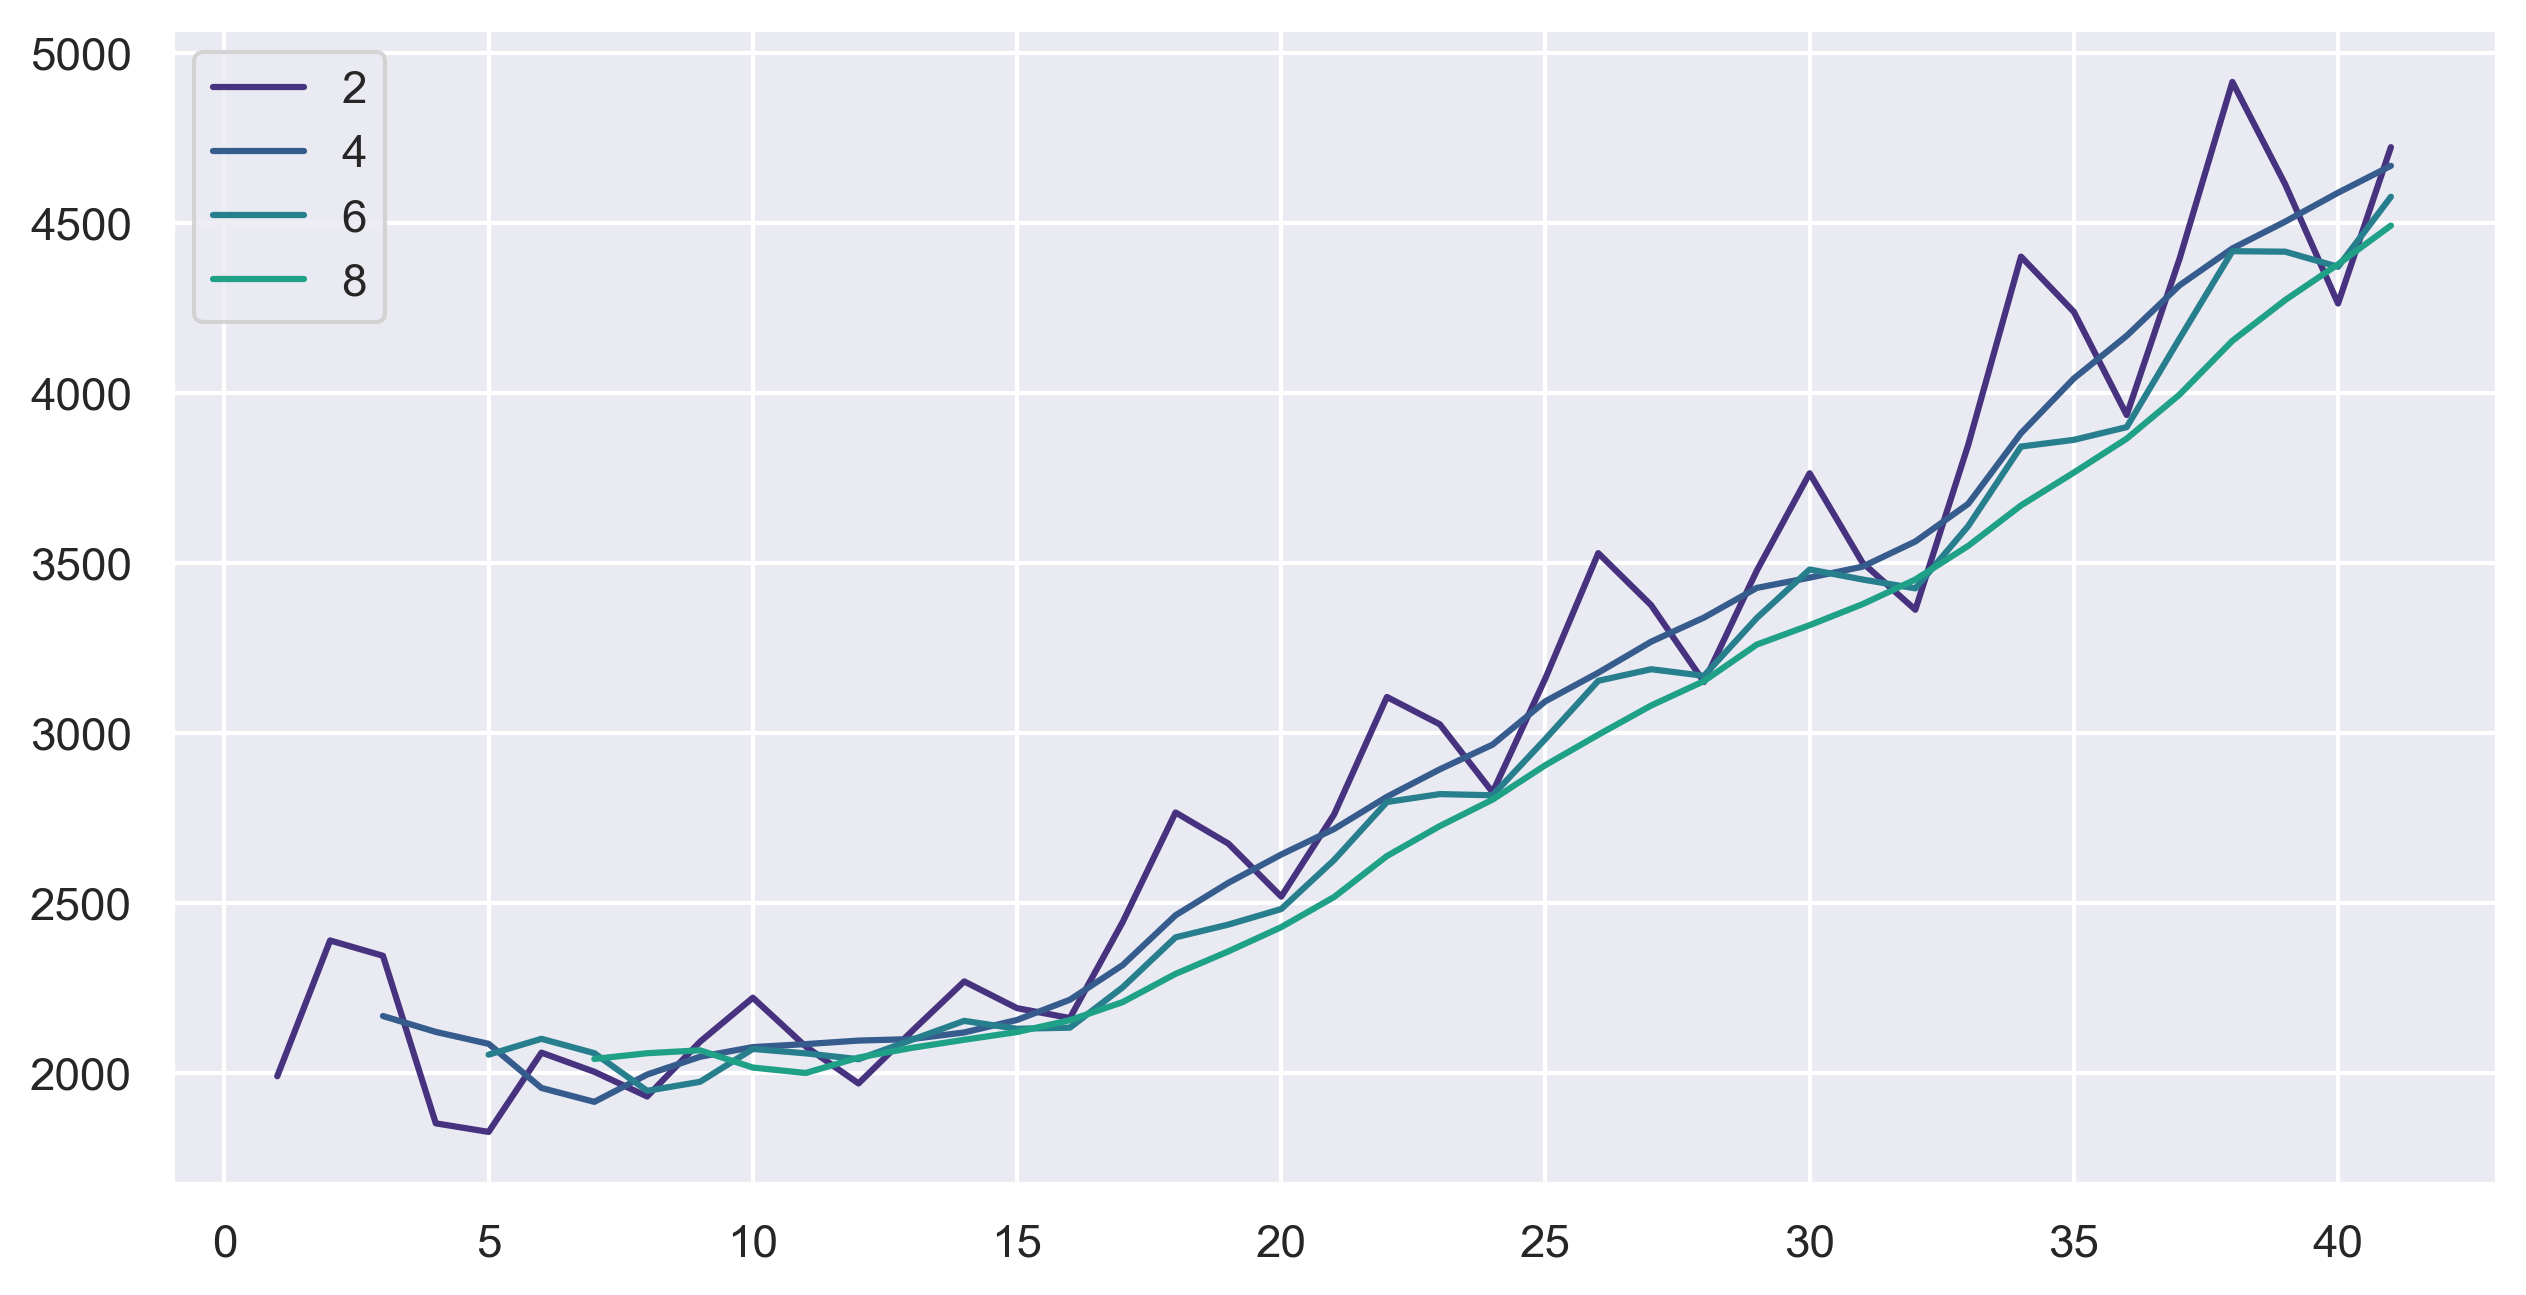

In [88]:
for i in range(2,10,2):
    df["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend()
plt.show()

In [89]:
df['year'] = '19' + df['Quarter'].str[-2:]
df

,Quarter,Sales,t,log_Sales,t_square,year
0,Q1_86,1734.827000,1,7.458663,1,1986
1,Q2_86,2244.960999,2,7.716443,4,1986
2,Q3_86,2533.804993,3,7.837477,9,1986
3,Q4_86,2154.962997,4,7.675529,16,1986
4,Q1_87,1547.818996,5,7.344602,25,1987
5,Q2_87,2104.411995,6,7.651791,36,1987
6,Q3_87,2014.362999,7,7.608058,49,1987
7,Q4_87,1991.746998,8,7.596767,64,1987
8,Q1_88,1869.049999,9,7.533186,81,1988
9,Q2_88,2313.631996,10,7.746574,100,1988


In [90]:
df = pd.concat([df, pd.get_dummies(df['Quarter'].str[:2], prefix='Quarter').astype('int')], axis=1)
df

,Quarter,Sales,t,log_Sales,t_square,year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,Q1_86,1734.827000,1,7.458663,1,1986,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,1986,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,1986,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,1986,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,1987,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,1987,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,1987,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,1987,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,1988,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,1988,0,1,0,0


<Axes: xlabel='year', ylabel='Sales'>

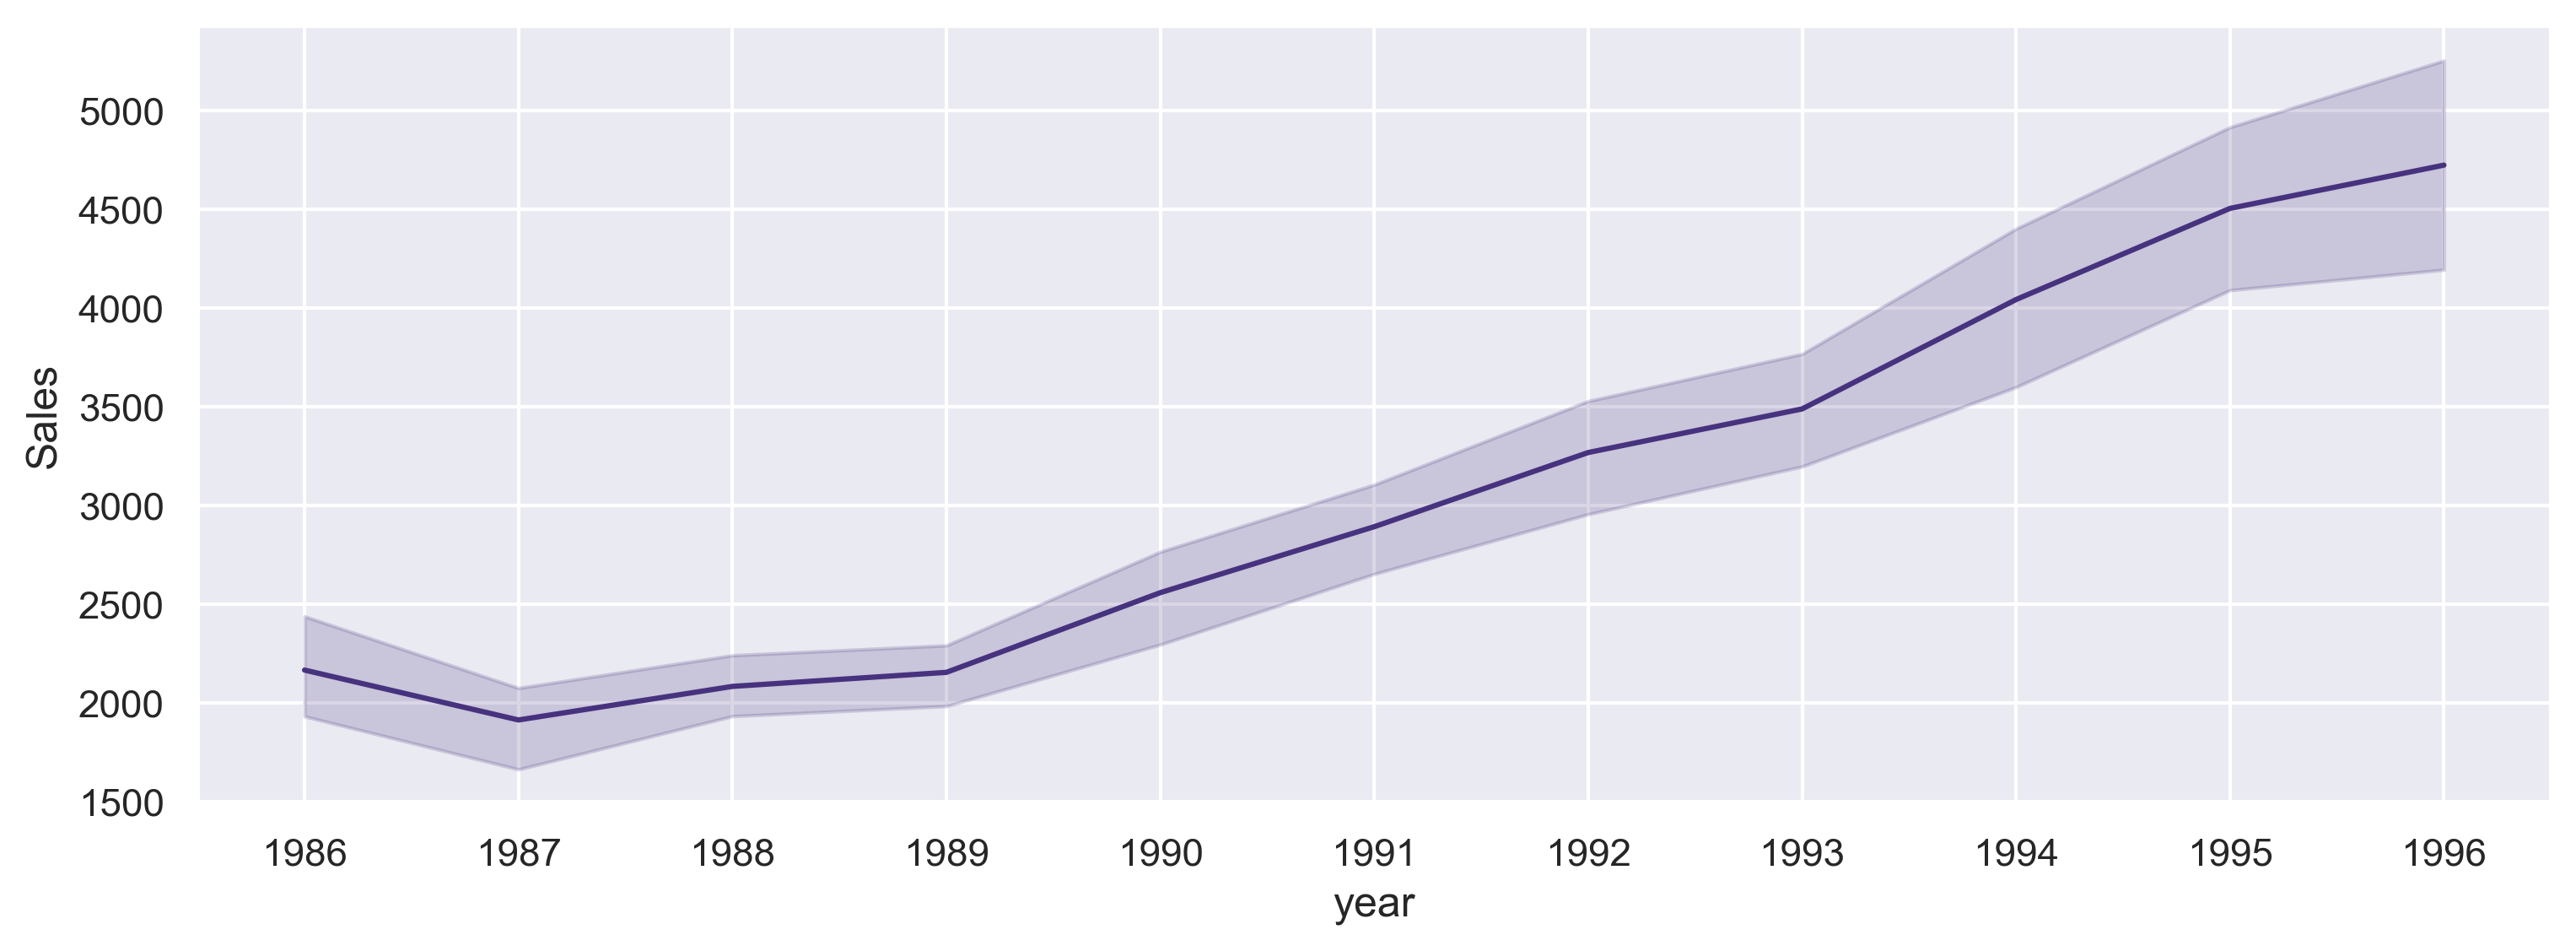

In [91]:
plt.figure(figsize = (12,4))
sns.lineplot(x = 'year' , y ='Sales' , data=df)

In [93]:
train = df.head(30)
test = df.tail(12) 
test

,Quarter,Sales,t,log_Sales,t_square,year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
30,Q3_93,3629.0,31,8.196712,961,1993,0,0,1,0
31,Q4_93,3373.0,32,8.123558,1024,1993,0,0,0,1
32,Q1_94,3352.0,33,8.117312,1089,1994,1,0,0,0
33,Q2_94,4342.0,34,8.376090,1156,1994,0,1,0,0
34,Q3_94,4461.0,35,8.403128,1225,1994,0,0,1,0
35,Q4_94,4017.0,36,8.298291,1296,1994,0,0,0,1
36,Q1_95,3854.0,37,8.256867,1369,1995,1,0,0,0
37,Q2_95,4936.0,38,8.504311,1444,1995,0,1,0,0
38,Q3_95,4895.0,39,8.495970,1521,1995,0,0,1,0
39,Q4_95,4333.0,40,8.374015,1600,1995,0,0,0,1


In [94]:
train

,Quarter,Sales,t,log_Sales,t_square,year,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,Q1_86,1734.827000,1,7.458663,1,1986,1,0,0,0
1,Q2_86,2244.960999,2,7.716443,4,1986,0,1,0,0
2,Q3_86,2533.804993,3,7.837477,9,1986,0,0,1,0
3,Q4_86,2154.962997,4,7.675529,16,1986,0,0,0,1
4,Q1_87,1547.818996,5,7.344602,25,1987,1,0,0,0
5,Q2_87,2104.411995,6,7.651791,36,1987,0,1,0,0
6,Q3_87,2014.362999,7,7.608058,49,1987,0,0,1,0
7,Q4_87,1991.746998,8,7.596767,64,1987,0,0,0,1
8,Q1_88,1869.049999,9,7.533186,81,1988,1,0,0,0
9,Q2_88,2313.631996,10,7.746574,100,1988,0,1,0,0


In [95]:
# Linear_Model

linear_model = smf.ols('Sales~t' , data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'], pred_linear))
rmse_linear

714.0144483281297

In [96]:
#Exponential

Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(test['Sales'], pred_Exp))
rmse_Exp

4252.188990972336

In [97]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(test['Sales'],pred_Quad))
rmse_Quad

646.2715428311323

In [98]:
#Additive seasonality 
add_sea = smf.ols('Sales~Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Quarter_Q1', 'Quarter_Q2','Quarter_Q3','Quarter_Q4']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea))
rmse_add_sea

1778.0065467941363

In [99]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Quarter_Q1', 'Quarter_Q2','Quarter_Q3','Quarter_Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

586.0533067871024

In [100]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Quarter_Q1+Quarter_Q2+Quarter_Q3+Quarter_Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(test['Sales'], pred_Mult_add_sea))
rmse_Mult_add_sea 

4252.185655793222

In [101]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,4252.185656
1,rmse_Exp,4252.188991


<Axes: xlabel='MODEL', ylabel='RMSE_Values'>

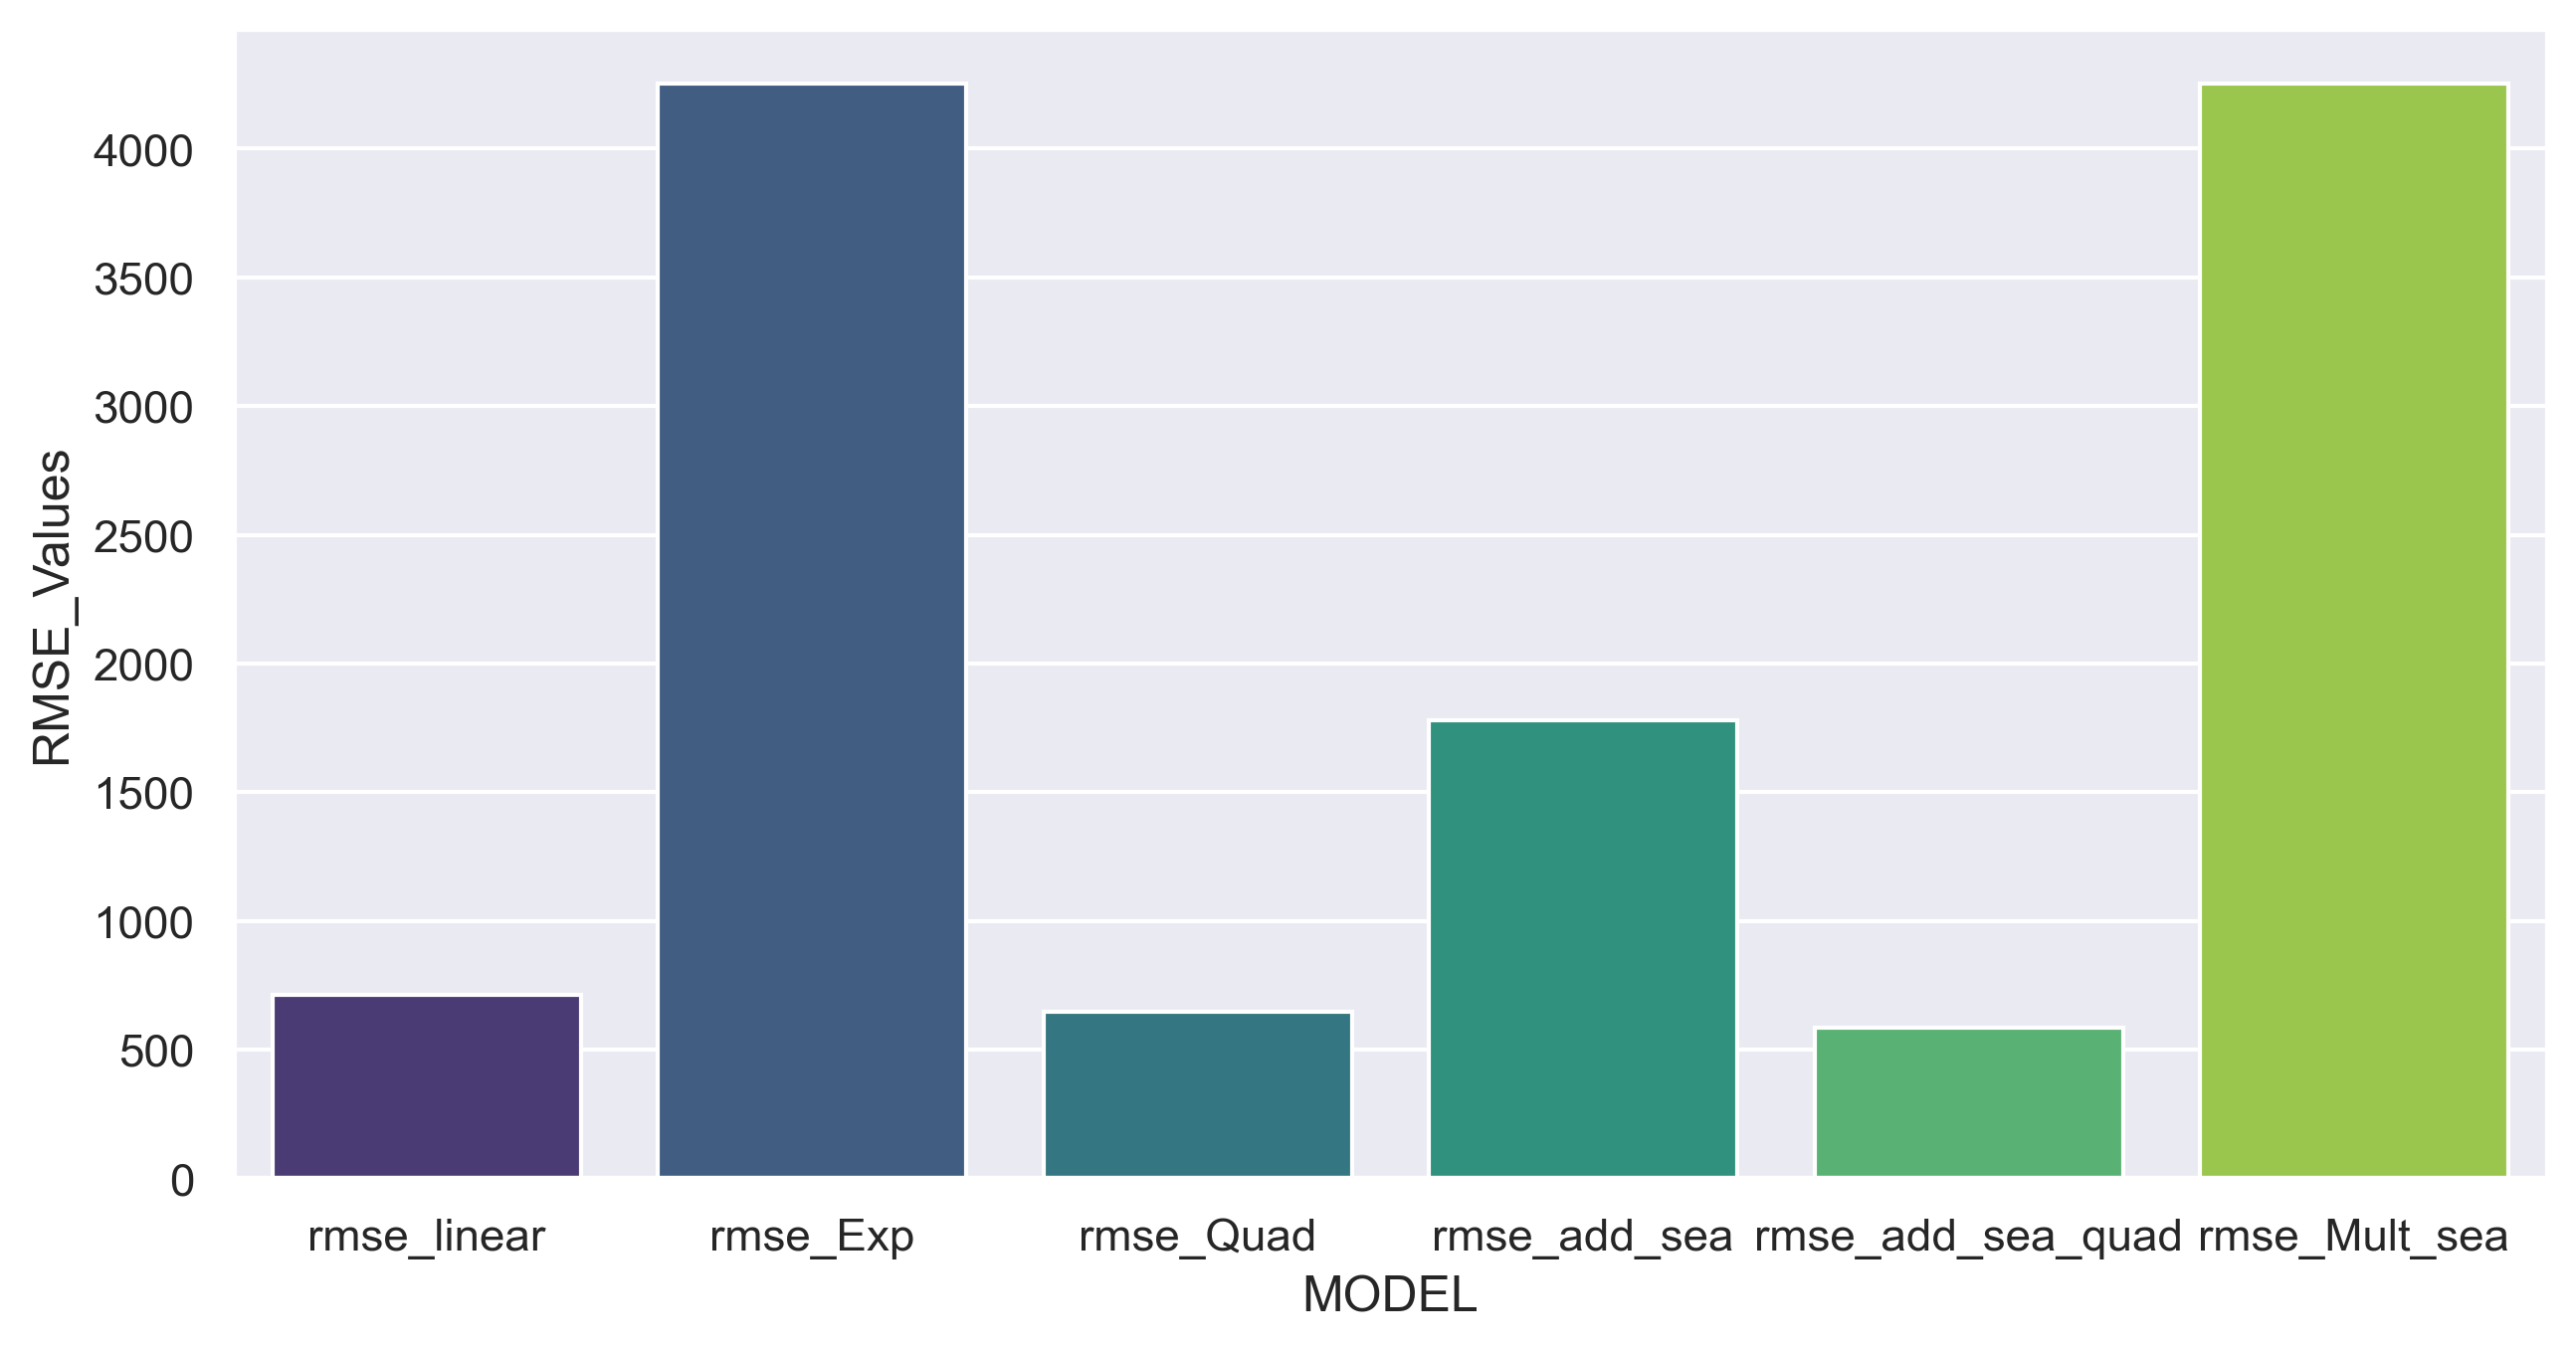

In [102]:
sns.barplot(x=table_rmse['MODEL'] , y = table_rmse['RMSE_Values'] )